# Covid Project

## Introduction
The data we are analysing is in relation to tracking cases and trends of COVID-19 in the United States. The data was sourced from the CDC which is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic. In the dataset contains individual-level data and each row represents and individual case of COVID-19. The dataset has 19 elements for all COVID-19 cases shared with CDC and includes demographics, geography (county and state of residence), any exposure history, disease severity indicators and outcomes, and presence of any underlying medical conditions and risk behaviors. This project aims to clean the dataset and then analyse the data to find trends and patterns in the data. I also look at key feauture pais within the data and work on creating my own key feature pairs.

# 0. Installing Packages

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For showing plots directly in the notebook run the command below
%matplotlib inline

df = pd.read_csv('covid19-cdc-20478622.csv', keep_default_na=True, delimiter=',', skipinitialspace=True, encoding='Windows-1252')

# 1. Data Quality Report

### Check shape of CSV file

In [102]:
# Check how many rows and columns this dataframe has
print('Rows',df.shape[0])
print('Columns',df.shape[1])

Rows 50000
Columns 19


The dataset has 50000 entries with 19 features per entry.

### Print first and last 5 rows of CSV file

In [103]:
# Check the first 5 rows of the dataframe
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,CA,6.0,SANTA CLARA,6085.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
1,2021-01,FL,12.0,PUTNAM,12107.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Probable Case,Missing,No,Missing,Yes,NaN
2,2020-11,OK,40.0,CLEVELAND,40027.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN
3,2020-11,WA,53.0,KING,53033.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,Yes
4,2020-08,TX,48.0,HIDALGO,48215.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN


In [104]:
# Check the last 5 rows of the dataframe
df.tail(5)  

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2021-12,MN,27.0,ANOKA,27003.0,18 to 49 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49996,2020-08,NC,37.0,EDGECOMBE,37065.0,0 - 17 years,Female,White,NaN,1.0,0.0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
49997,2022-01,IN,18.0,MARION,18097.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49998,2020-12,KS,20.0,WYANDOTTE,20209.0,18 to 49 years,Female,White,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,No,NaN
49999,2022-05,MD,24.0,ANNE ARUNDEL,24003.0,18 to 49 years,Female,Missing,Missing,NaN,NaN,Missing,Missing,Probable Case,Missing,No,Missing,No,NaN


### Convert features to appropriate datatypes

In [105]:
# Check the data types of the columns
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

### Reason for Making Certain Cells Categorical

Categorical data types are used to represent data that falls into a limited number of categories or distinct groups. By converting these columns to categorical data types, we can optimize memory usage and improve performance when working with these columns.

The following columns are being converted to categorical data types:
- res_state
- res_county
- age_group
- sex
- race
- ethnicity
- process
- exposure_yn
- current_status
- symptom_status
- hosp_yn
- icu_yn
- death_yn
- underlying_conditions_yn

By converting these columns to categorical data types, we can efficiently store and process the data, as well as perform operations such as grouping, filtering, and aggregating based on these categorical variables.


In [106]:
# Convert categorical columns
categorical_cols = ['res_state', 'res_county', 'age_group', 'sex', 'race', 'ethnicity', 
                    'process', 'exposure_yn', 'current_status', 'symptom_status', 
                    'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Date column is being converted to a datetime

In [107]:
# Convert date column
df['case_month'] = pd.to_datetime(df['case_month'], format='%Y-%m')

In the cell below, the two columns 'case_positive_specimen_interval' and 'case_onset_interval' are being converted to continuous data types. They are being converted to type int as they are defined as integers in the data dictionary.

Continuous data represents measurements or observations that can take on any value within a specific range. These columns contain numerical values that represent time intervals.

By converting these columns to continuous data types, we can perform mathematical operations and calculations on these values, such as calculating averages, standard deviations, and correlations.

Converting these columns to continuous data types also ensures that the data is correctly interpreted and processed by statistical and machine learning algorithms, which often require numerical inputs.



In [108]:
# Ensure numerical columns are treated as such
continuous_cols = ['case_positive_specimen_interval', 'case_onset_interval']
for col in continuous_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [109]:
# Convert FIPS codes to categorical
df['state_fips_code'] = df['state_fips_code'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')

In [110]:

df.dtypes

case_month                         datetime64[ns]
res_state                                category
state_fips_code                          category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval           float64
case_onset_interval                       float64
process                                  category
exposure_yn                              category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
dtype: object

### Check for duplicate row/columns

In [111]:
# Check for duplicate columns
dfT = df.T
print("Number of duplicate (excluding original) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including original) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) columns in the table is:  0
Number of duplicate (including original) columns in the table is:  0


In [112]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

#Count of duplicate rows including original
print(f'Number of duplicate rows including original: {df[df.duplicated(keep=False)].shape[0]}')


Number of duplicate rows: 4616
Number of duplicate rows including original: 7789


#### Result - Duplicate rows exist

- Duplicate rows exist in the df DataFrame, as shown in the duplicated_rows variable. However, these duplicate rows are not being removed because each row represents an individual case in the dataset. Each row contains unique information about a specific case, including the case month, state, county, age group, sex, race, ethnicity, and other relevant attributes. It is highly likely that two people from the same location, age group, ethnicity etc. had the same covid outcome. Therefore, it is important to retain these duplicate rows to ensure that each case is accurately represented and analyzed in the dataset.
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

In [113]:
duplicated_rows=df[df.duplicated(keep=False)]
duplicated_rows.sort_values(by=['case_month','res_state']).head(10)


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
1441,2020-01-01,GA,13.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
1456,2020-01-01,GA,13.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4848,2020-01-01,GA,13.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
6336,2020-01-01,GA,13.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
8146,2020-01-01,GA,13.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
2665,2020-03-01,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
6244,2020-03-01,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
3221,2020-03-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN
7141,2020-03-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN
3306,2020-03-01,FL,12.0,MIAMI-DADE,12086.0,50 to 64 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN


### Check for constant columns

In [114]:
# Identify constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

# Print constant columns
print("Constant columns:", constant_columns)

Constant columns: []


Based on the provided table, there are no constant columns in the DataFrame df. The variable constant_columns is an empty list, indicating that there are no columns in the DataFrame with a single unique value.

### Table with descriptive statistics for all the continuous features

In [115]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(include=['float64']).columns
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,26319.0,0.166306,2.131756,-105.0,0.0,0.0,0.0,73.0
case_onset_interval,21287.0,-0.044581,1.807788,-107.0,0.0,0.0,0.0,59.0


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [116]:
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### Table with descriptive statistics for all the categorical features

In [117]:
# Print table with categorical statistics
categorical_columns = df.select_dtypes(['category']).columns
categoricalFeatureDesc = df[categorical_columns].describe().T
categoricalFeatureDesc

,count,unique,top,freq
res_state,50000,50,NY,5516
state_fips_code,50000.0,50.0,36.0,5516.0
res_county,47195,953,MIAMI-DADE,969
county_fips_code,47195.0,1358.0,12086.0,969.0
age_group,49637,5,18 to 49 years,20353
sex,48916,4,Female,25536
race,43810,8,White,30274
ethnicity,43257,4,Non-Hispanic/Latino,29602
process,50000,11,Missing,45399
exposure_yn,50000,3,Missing,43068


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [118]:
categoricalFeatureDesc.to_csv("categoricalFeatureDescription.csv")

### Check for Null Values

In [119]:
df.isnull().sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                          2805
county_fips_code                    2805
age_group                            363
sex                                 1084
race                                6190
ethnicity                           6743
case_positive_specimen_interval    23681
case_onset_interval                28713
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           45886
dtype: int64

In [120]:

category_columns_perc_missing = {}
category_columns_perc_unknown = {}
for col in categorical_cols:
    category_columns_perc_missing[col] = 100 * (df[df[col] == 'Missing'].shape[0] / df.shape[0])
    category_columns_perc_unknown[col] = 100 * (df[df[col] == 'Unknown'].shape[0] / df.shape[0])

# Create a DataFrame from the dictionaries
df_category_perc_missing = pd.DataFrame.from_dict(category_columns_perc_missing, orient='index', columns=['%missing'])
df_category_perc_unknown = pd.DataFrame.from_dict(category_columns_perc_unknown, orient='index', columns=['%unknown'])

# Concatenate the two DataFrames
df_missing_unknown = pd.concat([df_category_perc_missing, df_category_perc_unknown], axis=1)

# Print the table
df_missing_unknown


,%missing,%unknown
res_state,0.000,0.000
res_county,0.000,0.000
age_group,0.194,0.000
sex,0.090,0.384
race,3.910,9.148
ethnicity,5.106,13.956
process,90.798,0.296
exposure_yn,86.136,4.164
current_status,0.000,0.000
symptom_status,42.248,11.134


The columns with null values include `case_positive_specimen_interval`, `case_onset_interval`, and others. It is important to handle these null values appropriately in the data analysis process, such as by imputing missing values or excluding them from certain calculations.There are also a number of columns with unknown or missing features it is important to handle these features appropriately, such as dropping the feauture, row or imputing the values.


### - Plot histograms individual sheet for all the continuous features.

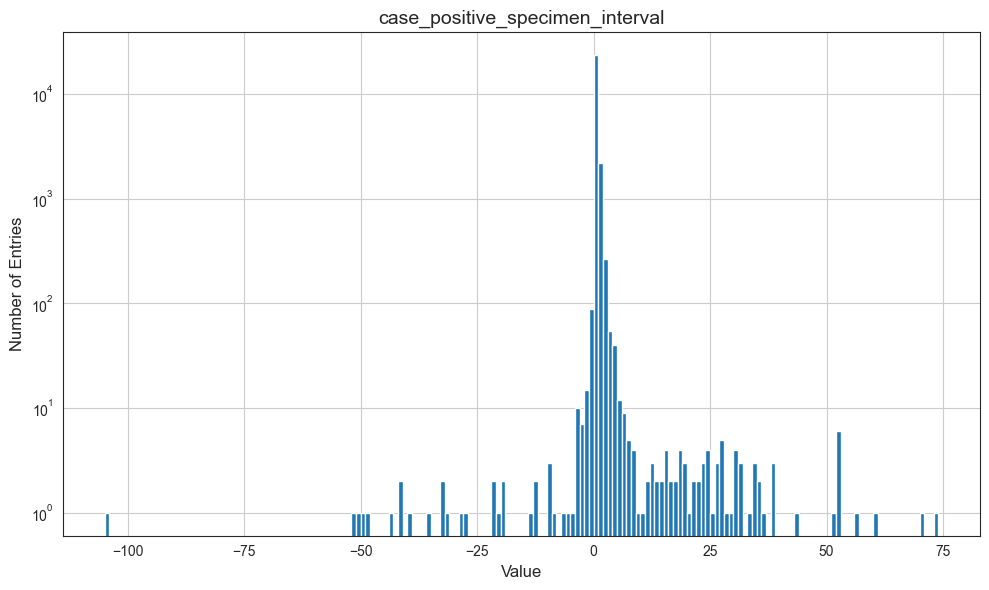

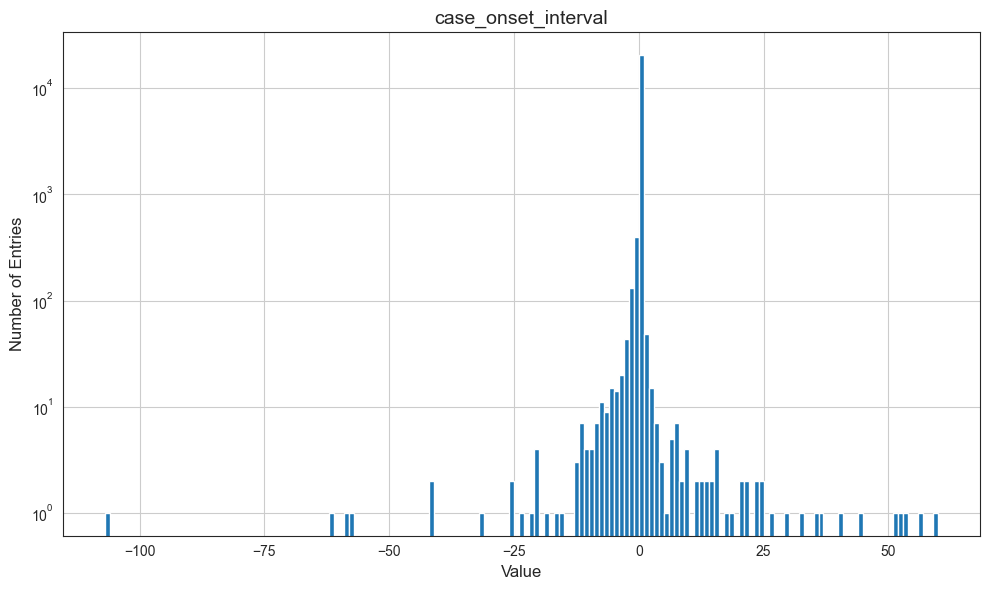

In [121]:


for col in continuous_columns:
    # Create a larger figure size for each plot
    plt.figure(figsize=(10, 6))
    
    # Adjust the bin size if necessary and plot with log scale for y-axis
    bin_range = range(int(df[col].min()), int(df[col].max()) + 2, 1)
    df[col].hist(bins=bin_range, log=True)
    
    # Set title and labels with larger fonts
    plt.title(col, fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Number of Entries', fontsize=12)
    
    # Optional: Improve layout
    plt.tight_layout()
    plt.savefig(f"{col}_histogram.png", dpi=300)
    
    plt.show()

### - Plot box plots individual sheet for all the continuous features.

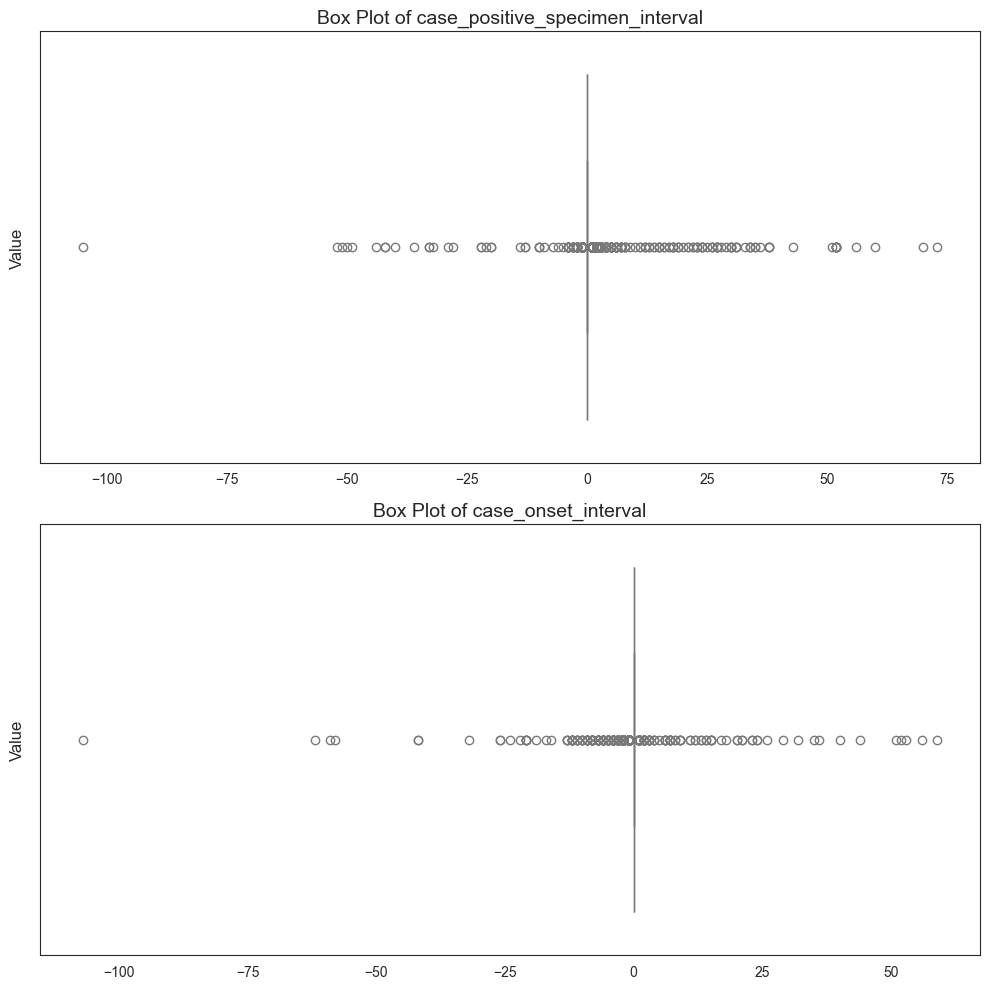

In [122]:
sns.set_style("white")
fig, axes = plt.subplots(len(continuous_columns), 1, figsize=(10, 5 * len(continuous_columns)), tight_layout=True)

for i, col in enumerate(continuous_columns):
    ax = axes[i]
    sns.boxplot(x=df[col], ax=ax, color='lightblue') 
    ax.set_title(f'Box Plot of {col}', fontsize=14)  
    ax.set_ylabel('Value', fontsize=12) 
    ax.set_xlabel('')  

plt.savefig('box_plots_continuous_features.png', dpi=300)  
plt.show()  

### - Plot bar plots summary sheet for all the categorical features.


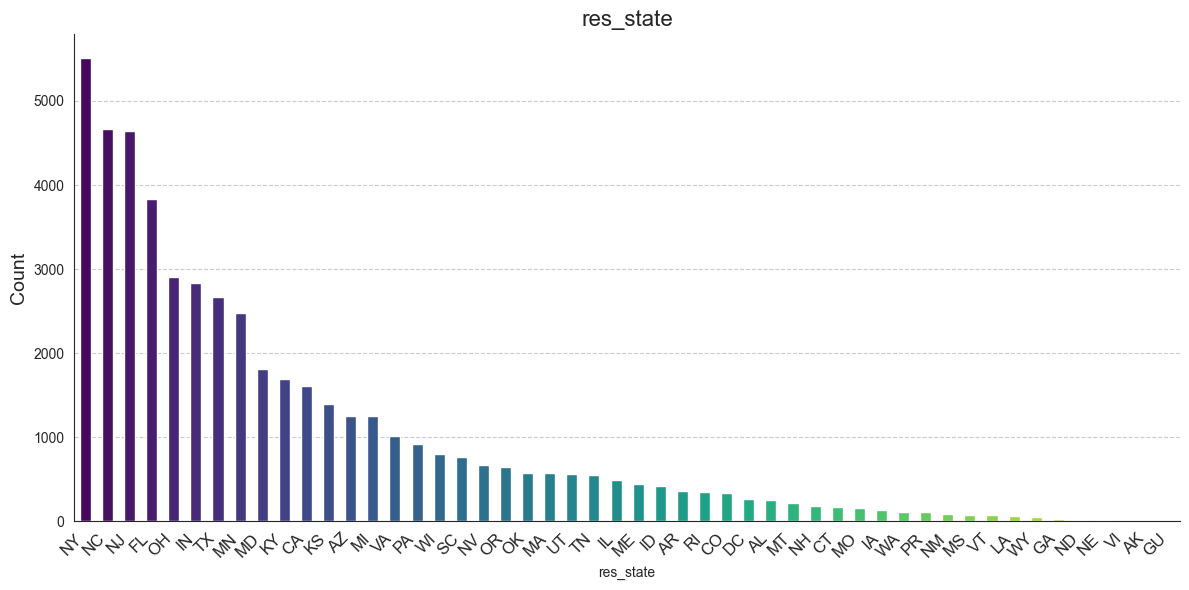

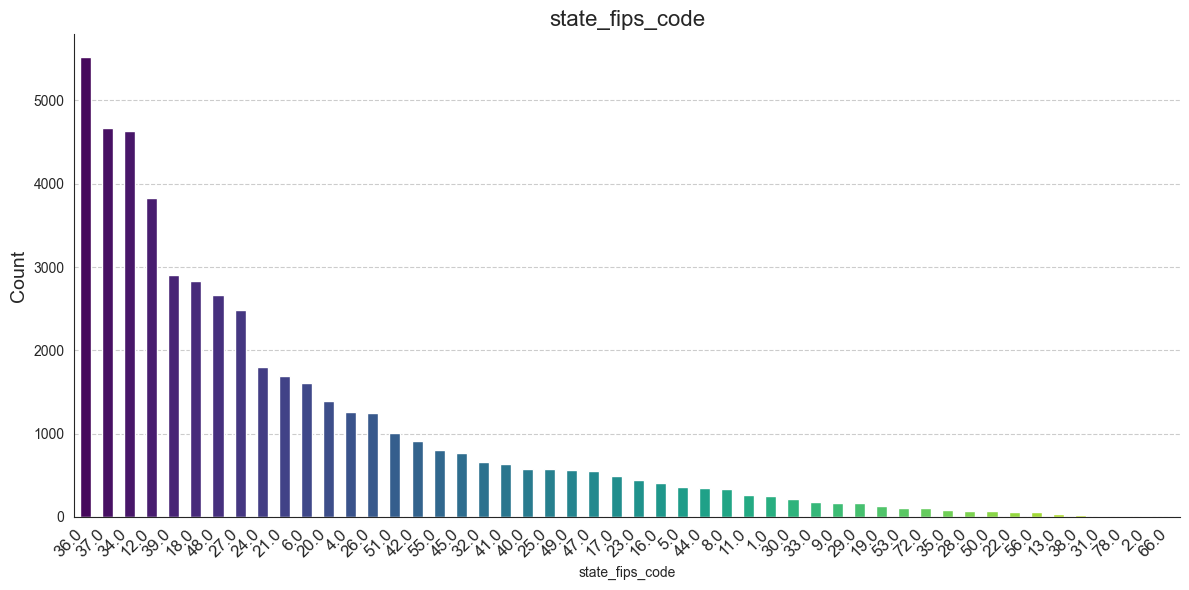

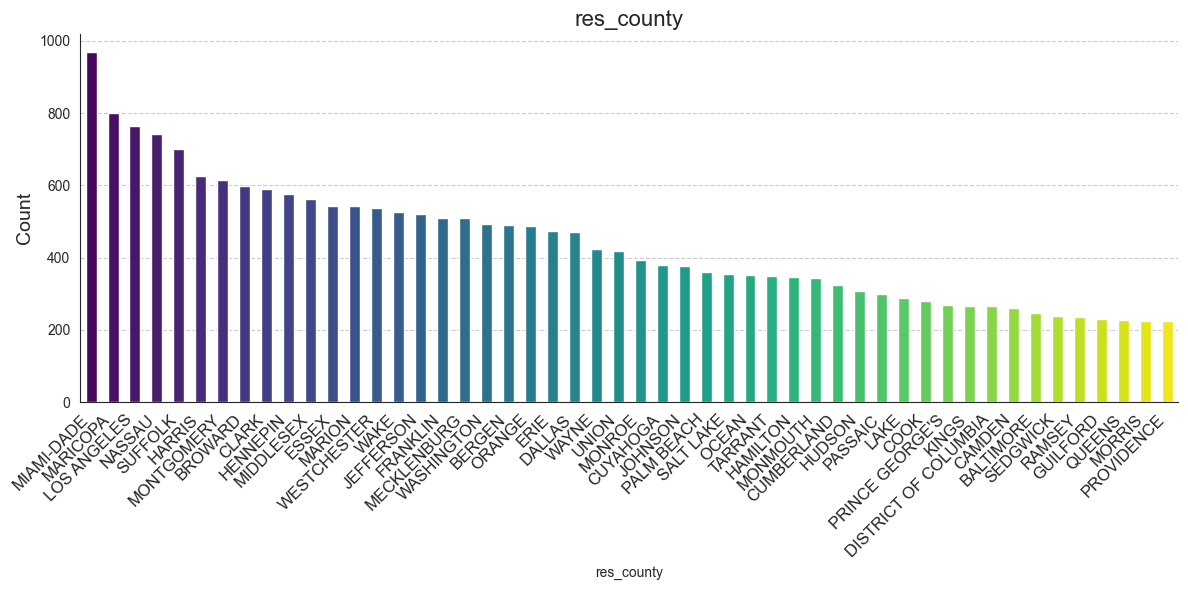

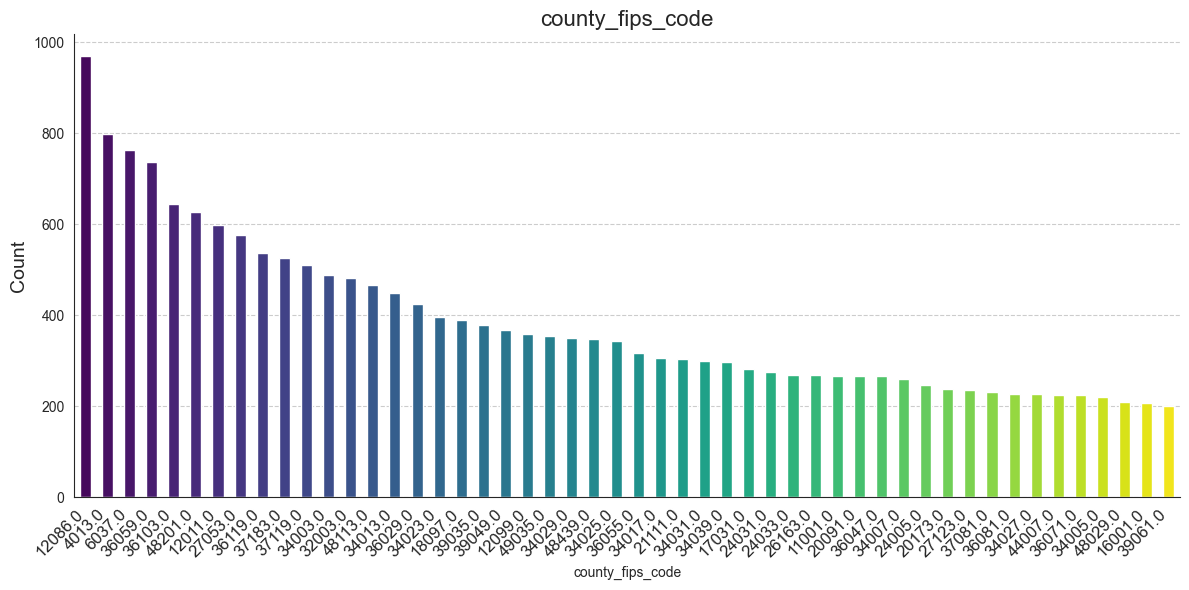

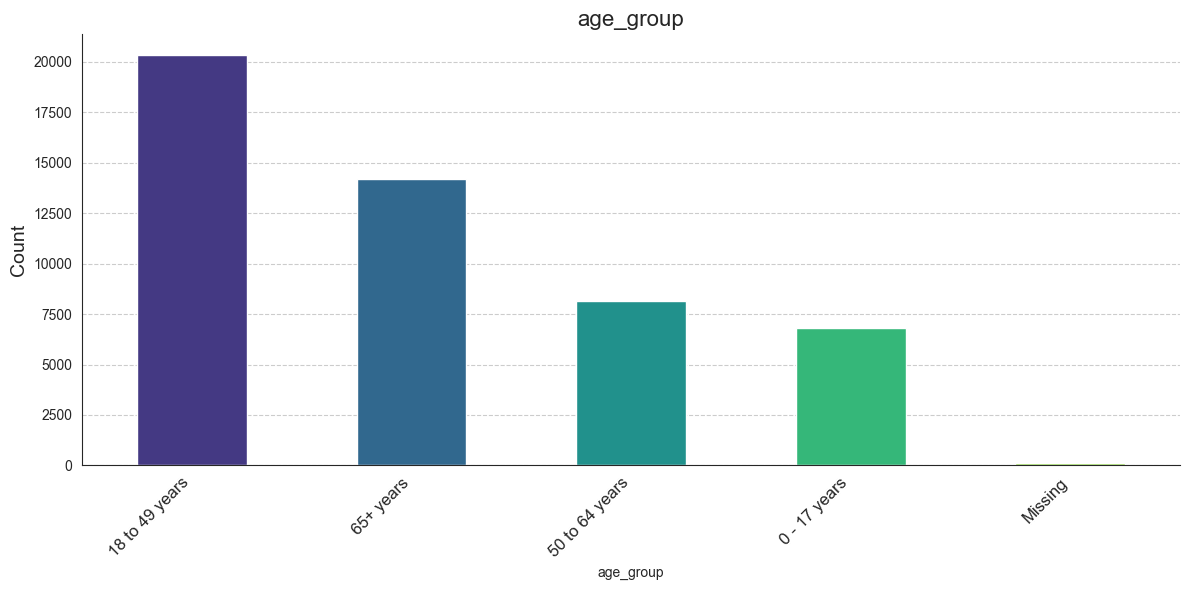

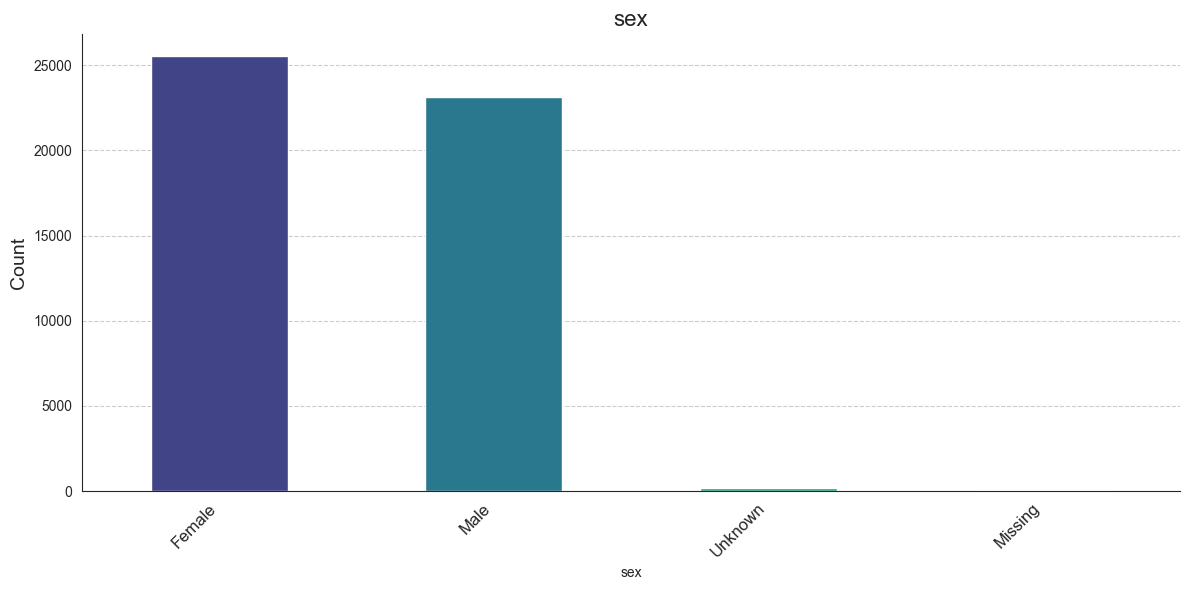

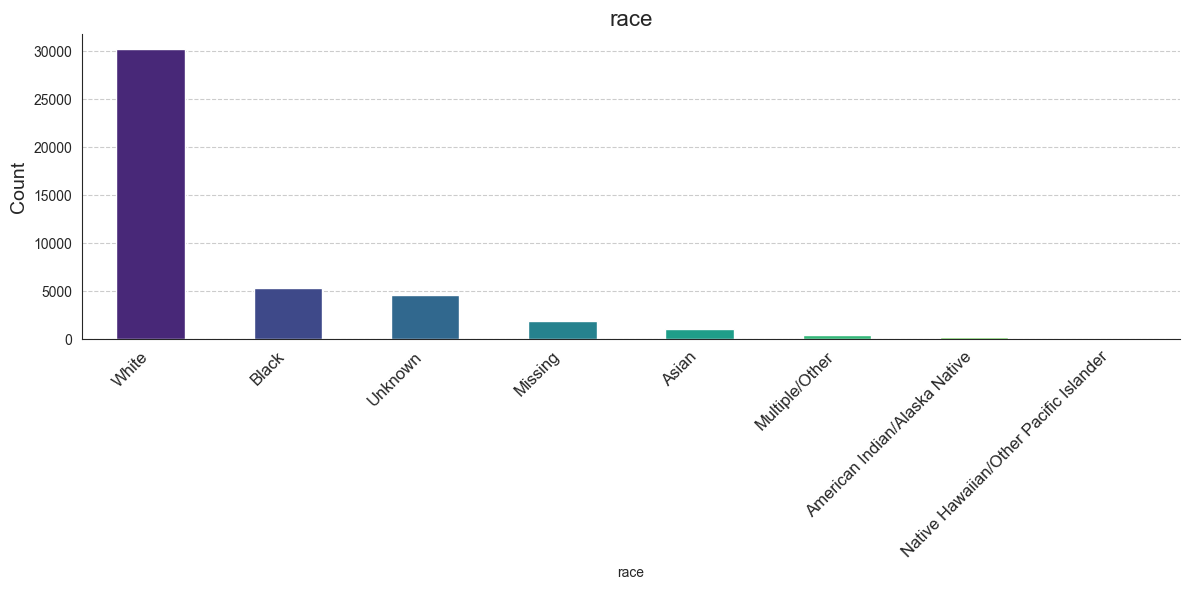

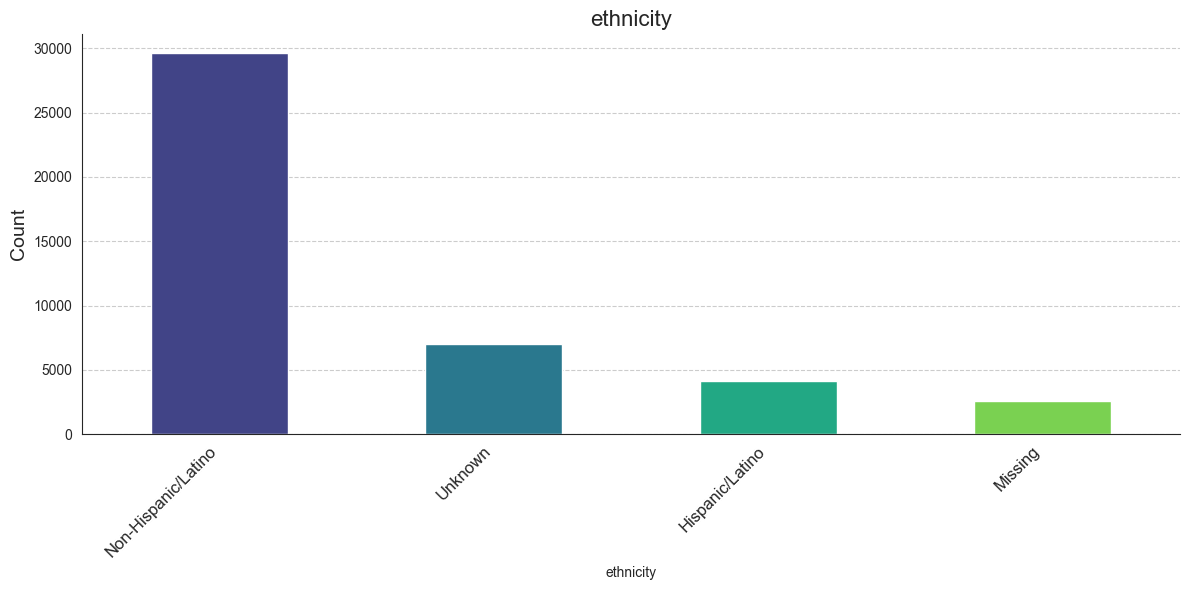

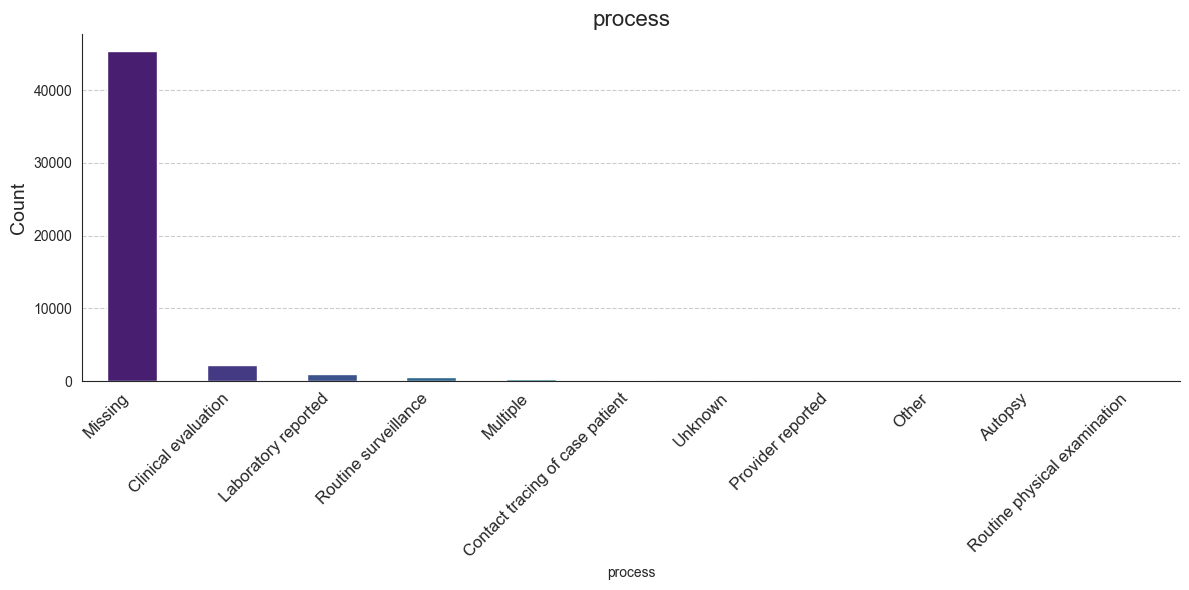

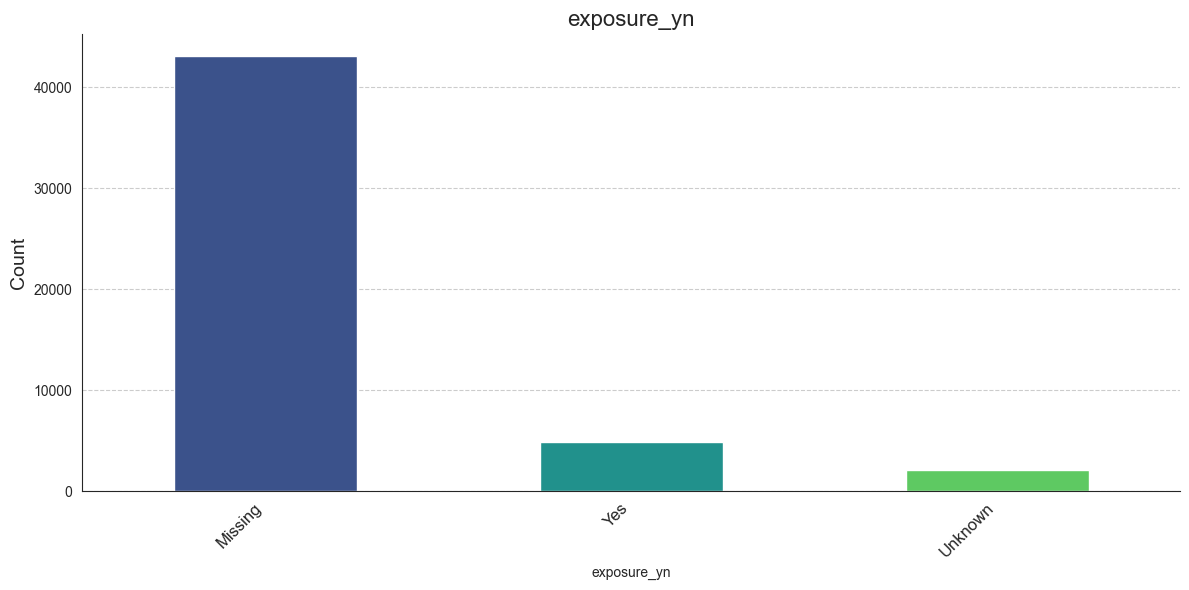

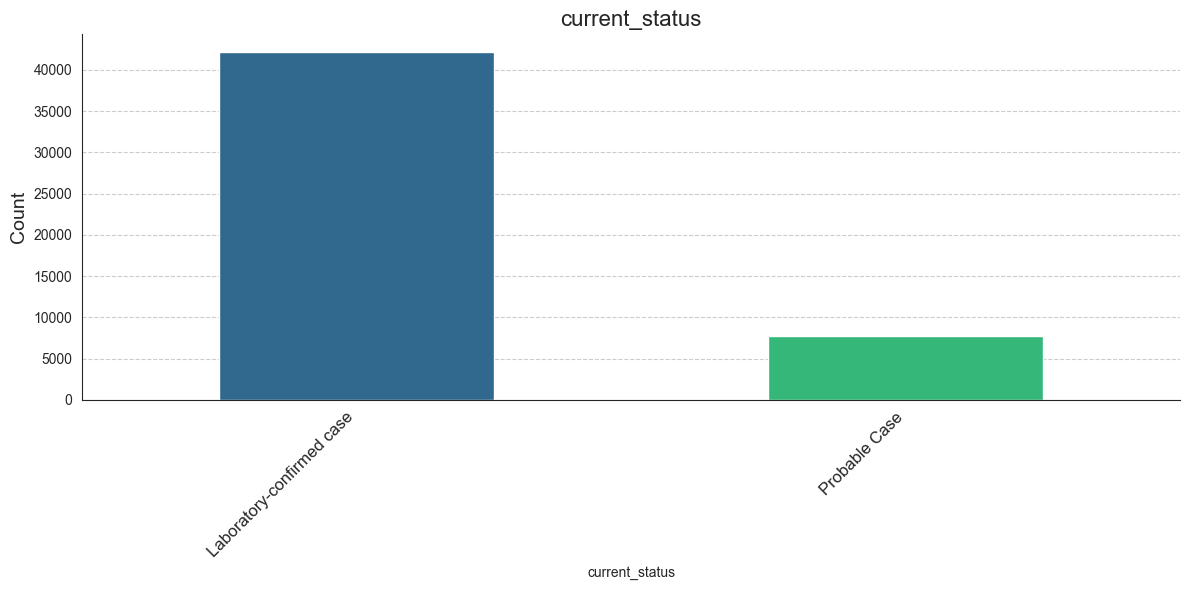

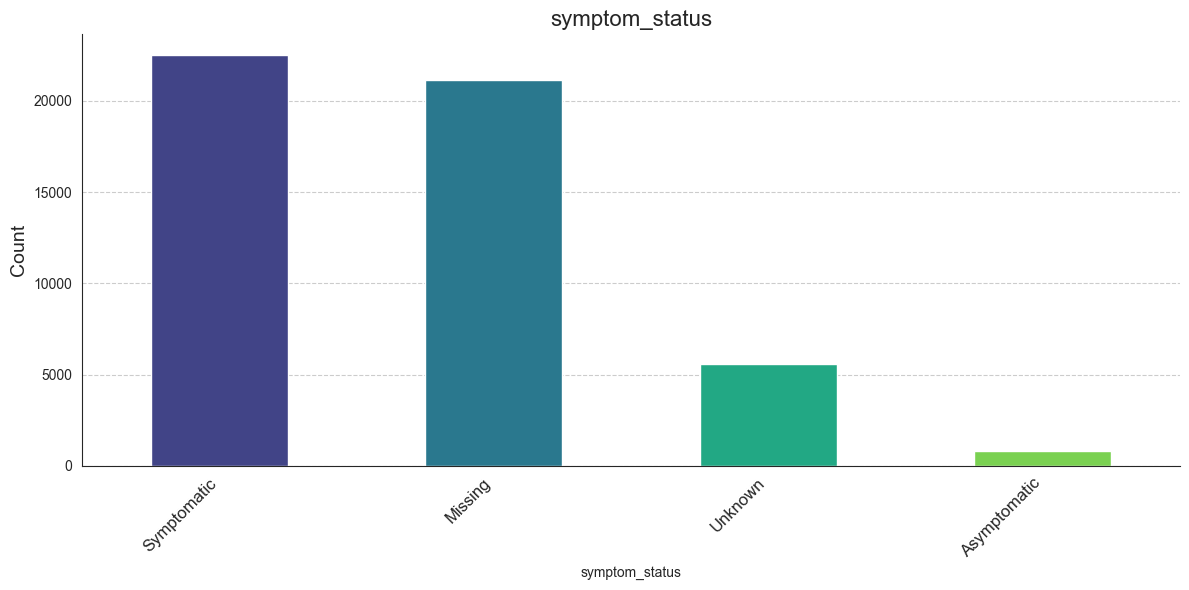

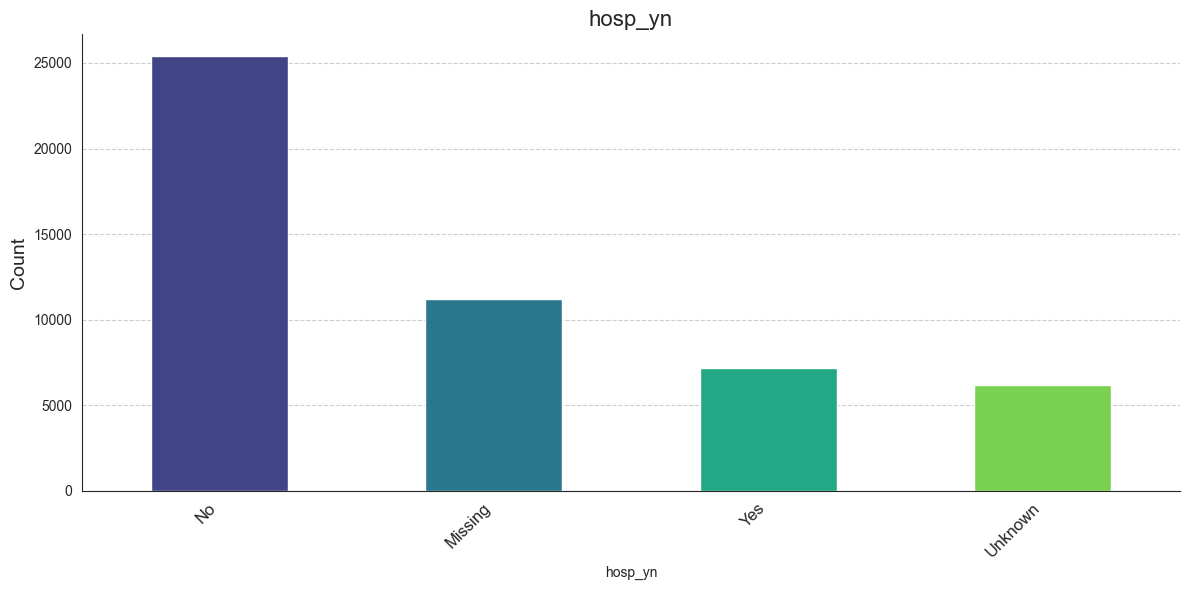

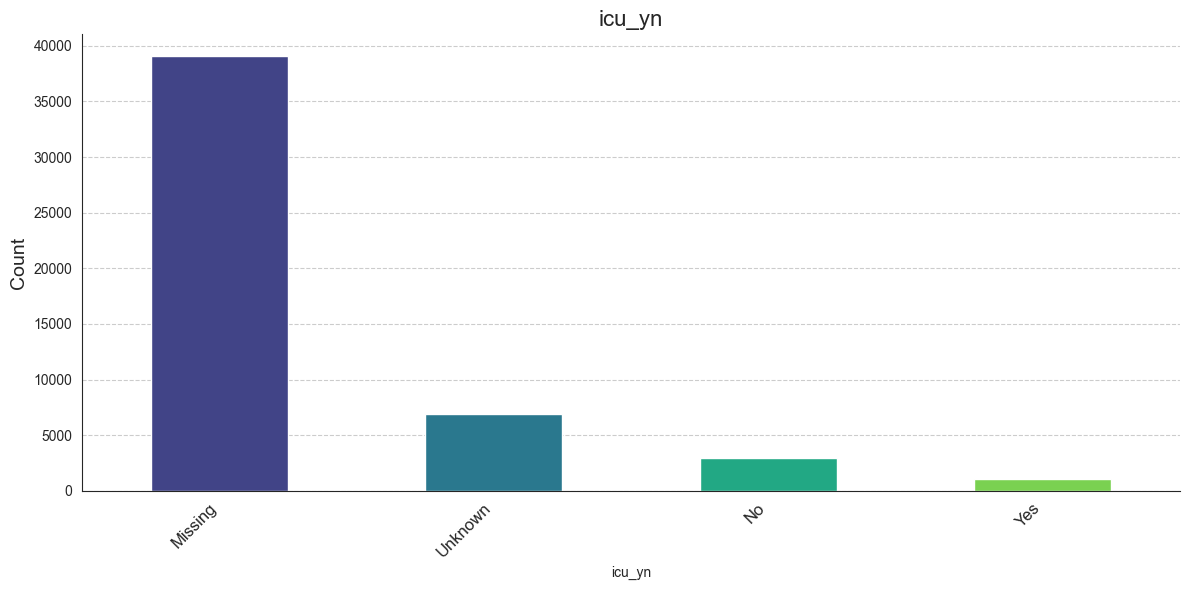

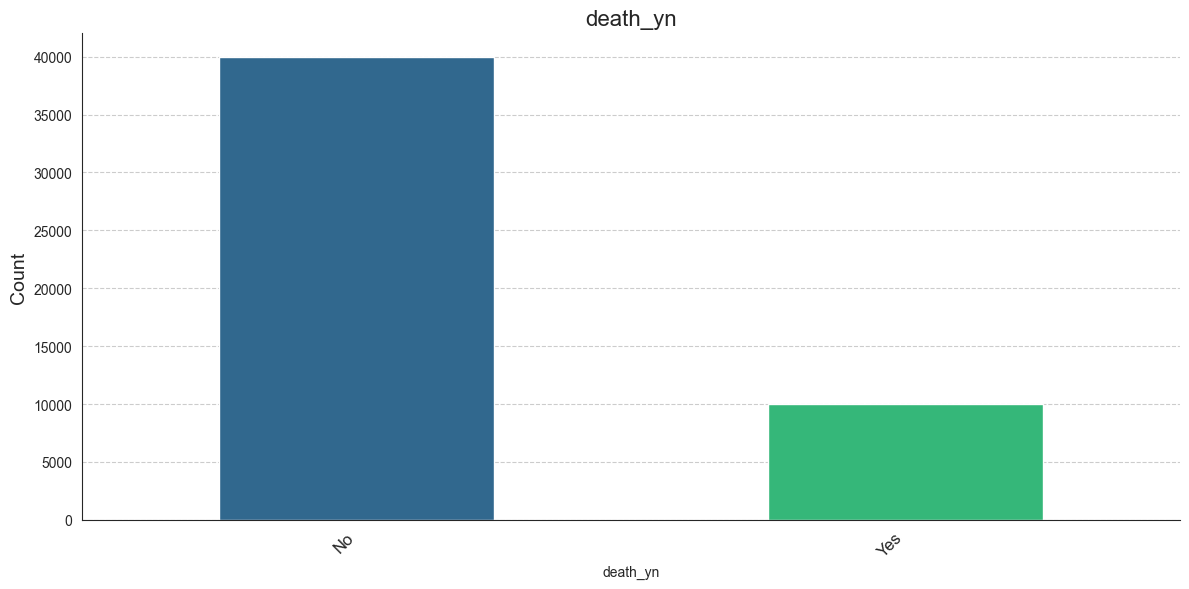

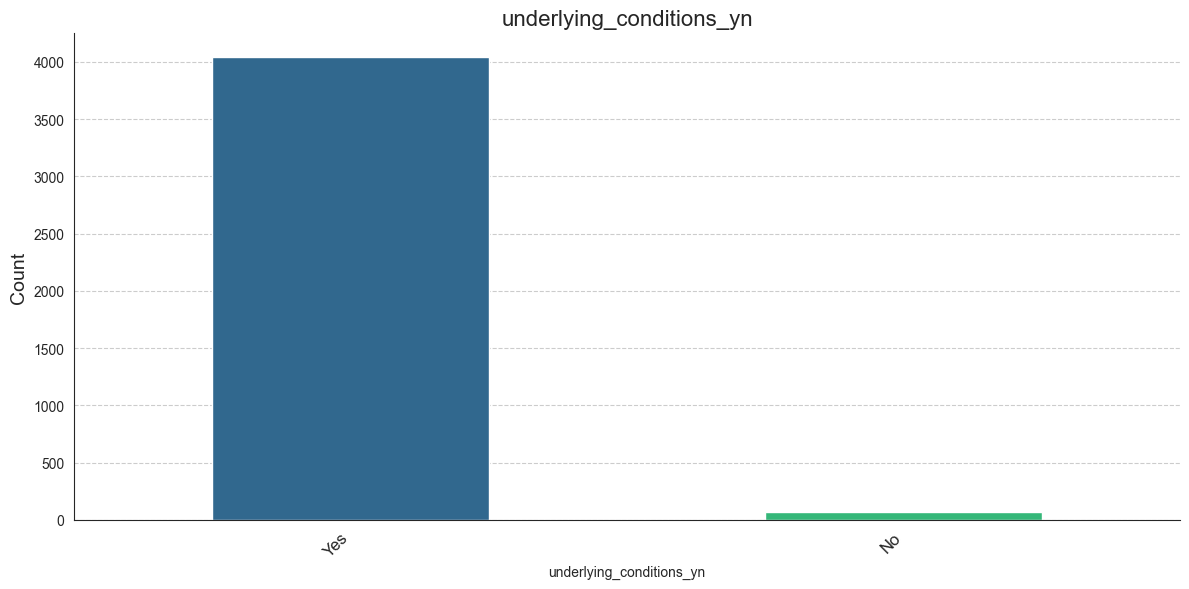

In [123]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_filename = 'categorical_summary_sheet.pdf'

with PdfPages(pdf_filename) as pdf:
    for col in categorical_columns:
        # Create a new figure for each category column
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Get top 50 categories
        top_categories = df[col].value_counts().head(50)
        
        # Plot with improved color palette
        color_palette = sns.color_palette("viridis", len(top_categories))
        top_categories.plot(kind='bar', ax=ax, color=color_palette)
        
        # Set titles and labels with improved aesthetics
        ax.set_title(col, fontsize=16)
        ax.set_ylabel('Count', fontsize=14)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
        ax.grid(axis='y', linestyle='--')
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        plt.tight_layout()
        
        # Add the current figure to the PDF
        pdf.savefig(fig)
        plt.show()
        # Close the figure to free memory
        plt.close(fig)
        

### Initial findings about continuous features
- The continuous features in the dataset include `case_positive_specimen_interval` and `case_onset_interval`. These features represent time intervals and are measured in weeks. The histograms and box plots for these continuous features show the distribution of values and the presence of outliers.
- The `case_positive_specimen_interval` feature has a right-skewed distribution, with a long tail of higher values. The box plot also shows the presence of outliers, which are values that fall outside the whiskers of the box plot.
- The `case_onset_interval` feature also has a right-skewed distribution, with a long tail of higher values. The box plot also shows the presence of outliers, which are values that fall outside the whiskers of the box plot.
- These findings provide insights into the distribution and spread of the continuous features, which can be further analyzed and visualized to understand the patterns and trends in the data.
- There are also a number of null values but this is due to the fact that `case_positive_specimen_interval` should be null unless there is a positive specimen collected. Also `case_onset_interval` should be null unless `symptom_status` is Symptomatic.
- The summary statistics indicate that when present, values cluster around 0, suggesting that many cases were confirmed or onset around the specimen collection time. 
- Negative values, which could represent data entry errors or specific cases where the onset occurred before specimen collection, need clarification.

### Initial Findings about Categorical Features
- There is a large number (over half the rows) of data missing, unknown or null in `underlying_conditions_yn`, `process`, `exposure_yn` and `icu_yn`. It is important to handle these missing values appropriately as they may impact the analysis and interpretation of the data.
- Some of the other features have a smaller number of null, missing or unknown values, which can be handled appropriately in the data analysis process.
- The `res_state` and `res_county` features have a large number of unique categories, indicating that the data is spread across multiple states and counties.



### - Save updated/cleaned data frame to a new csv file.

In [124]:
df.to_csv('covid19-cdc-20478622-1-1-cleaned.csv', index=False)

### Check Logical Integrity of Data
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values.

- Test 1 Check if `case_onset_interval` is null when `symptom_status` is Symptomatic

In [125]:
#print out the number of cases where case_onset interval is null and symptom_status is Symptomatic
test_1 = df[(df['case_onset_interval'].isnull()) & (df['symptom_status'] == 'Symptomatic')]
print("Number of rows failing the test: " , test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  1717


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
14,2020-12-01,OH,39.0,COLUMBIANA,39029.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,Yes
26,2022-01-01,AR,5.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Unknown,Probable Case,Symptomatic,Unknown,Unknown,Yes,NaN
27,2020-05-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN
53,2022-01-01,AR,5.0,BENTON,5007.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Unknown,Laboratory-confirmed case,Symptomatic,Unknown,Unknown,Yes,NaN
87,2021-01-01,PA,42.0,PHILADELPHIA,42101.0,65+ years,Male,Black,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN


We can see that there are a number of null values in `case_onset_interval` where the `symptom_status` is Symptomatic. This is an error in the data and should be handled appropriately.

- Test 2 Check if `case_onset_interval` is not null when `symptom_status` is not Symptomatic

In [126]:
test_2 = df[(df['case_onset_interval'].notnull()) & (df['symptom_status'] != 'Symptomatic')]
print("Number of rows failing the test : " , test_2.shape[0])
test_2.head(5)

Number of rows failing the test :  493


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19,2020-12-01,IL,17.0,COOK,17031.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
39,2020-10-01,IL,17.0,MADISON,17119.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
48,2022-01-01,IL,17.0,COOK,17031.0,65+ years,Male,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
122,2020-11-01,IL,17.0,MADISON,17119.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
146,2020-10-01,IL,17.0,COOK,17031.0,50 to 64 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN


- Test 3 Check if `case_positive_specimen_interval` is null when `current_status` is Laboratory-confirmed case

In [127]:
#Check if `case_positive_specimen_interval` is null when `current_status` is Laboratory-confirmed case
test_3 = df[(df['case_positive_specimen_interval'].isnull()) & (df['current_status'] == 'Laboratory-confirmed case')]
print("Number of rows failing the test: " , test_3.shape[0])

Number of rows failing the test:  20428


- Test 4 Check if `case_positive_specimen_interval` is not null when `current_status` is not Laboratory-confirmed case

In [128]:
test_4 = df[(df['case_positive_specimen_interval'].notnull()) & (df['current_status'] != 'Laboratory-confirmed case')]
print("Number of rows failing the test : " , test_4.shape[0])

Number of rows failing the test :  4548


- Test 5 Check if `res_state` is represented by 1 `state_fips_code`

In [129]:
#Check if `res_state` is represented by 1 `state_fips_code`
test_5 = df.groupby('res_state', observed=True)['state_fips_code'].nunique()
print("Number of rows failing the test: " , test_5[test_5 != 1].shape[0])

Number of rows failing the test:  0


- Test 6 Check if `res_county` is represented by 1 `county_fips_code`

In [130]:
fips_county_mapping = df.groupby('county_fips_code', observed=True)['res_county'].nunique()
fips_with_multiple_counties = fips_county_mapping[fips_county_mapping > 1].index
test_6 = df[df['county_fips_code'].isin(fips_with_multiple_counties)]
print(f"Number of rows failing the test: {test_6.shape[0]}")


Number of rows failing the test: 13


Note: The number of unique values for `res_county` and `county_fips_code` are not equal as there are counties with the same name in different states, therefore they are uniquely identified by the `county_fips_code`.

In [131]:
test_6['county_fips_code'].nunique()

1

All rows failing test 6 are from the same county_fips_code. Looking at the data we can tell there is a special character casuing a problem in the res_county. Upon reseach of the county_fips_code we can see that the county is in fact DONA ANA.

- Test 7 Check if `county_fips_code` is represented by 1 `state_fips_code`

In [132]:
test_7 = df.groupby('county_fips_code', observed=True)['state_fips_code'].nunique()
print("Number of rows failing the test: " , test_7[test_7 != 1].shape[0])

Number of rows failing the test:  0


- Test 8 Check if `case_month` is between 31st December 2019 and 31st December 2023

In [133]:
test_8 = df[(df['case_month'] < '2019-12-31') | (df['case_month'] > '2023-12-31')]
print("Number of rows failing the test: " , test_8.shape[0])

Number of rows failing the test:  0


# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

## Solutions for the issues identified in the **Data_Quality_Report_Initial_Findings.pdf**:

### 1. Null values in `res_county` and `county_fips_code`
- I must check if the `res_county` is represented by 1 `county_fips_code` or vice versa and impute the values accordingly. I could either impute with the mean or mode from the state or impute with 'Missing'. I will impute the values with 'Missing' as using the mean or mode could introduce bias.

### 2. Null values in `age_group` and `sex`
- If the missingness is not completely random (for instance, certain age groups or genders might be less likely to report age or gender), proper imputation could reduce bias introduced by missing data. I will impute the null values with 'Missing' rather than imputing with the mode or mean which could result in bias.

### 3. Null values in `race` and `ethnicity`
- For sensitive demographic variables like race and ethnicity, it's important to consider the ethical implications and ensure that imputation strategies do not inadvertently misrepresent or oversimplify the diversity within the population. I will impute the null values with 'Missing' rather than imputing with the mode or mean.

### 4. Null values in `case_onset_interval`
- I will impute or drop some of the null values with the mode based on the `symptom_status` respectively. The rest of the null values will be left as is. There is a large number of non missing values which are 0 so I must examine this further and be carful if imputing.

### 5. Null values in `underlying_conditions_yn`
- I will impute the null values with 'Missing'. It is important to handle these missing values appropriately as they may impact the analysis and interpretation of the data. Other imputation strategies could introduce bias or misrepresent the underlying conditions of the population.

### 6. Missing values in `symptom_status` where `case_onset_interval` is not null
- I will examine the data further and decide if I need to drop the rows or replace the values. It is important to ensure that the data is logically consistent and accurate for analysis.

### 7. Fix Values error in res_county found in test 6
- I will replace the value in the res_county with the correct value 'DONA ANA'. Other possible solutions could be to drop the rows however given that the `county_fips_code` is correct I will replace the value.

### 8. Examine Logical Integrity of `case_positive_specimen_interval` and `current_status`
- There seems to be descrepencies in the data. I will examine the data further and decide if I need to drop the rows or replace the values.

### 9. Dealing with negative values in `case_onset_interval`
- Negative values in `case_onset_interval` could represent data entry errors. I will examine the data further and decide if I need to drop the rows or replace the values.

### 10. Presence of outliers in continuous features
- There are a significant number of outliers present across a range of different features. They initailly look plausible but will need to be investigated further. If they don't make sense they will be removed.

### 11. Look at if I should keep the features `process` and `exposure_yn`
- These two values have a large proportion of missing data values. I will look into them further to decide if they should be dropped or imputed.

### 12. Drop columns `state_fips_code` and `county_fips_code`
- These columns are not needed as it contains the same information as `res_state` and `res_county` respectively. I will drop these columns. The reason I want to keep `res_state` and `res_county` is because it is easier to read and clearer.


### 2.1 Null values in `res_county` and `county_fips_code`

I will check to see if I can impute the res_county based on the county_fips_code or vice versa.

In [134]:
#Fing the rows where res_county is null and county_fips_code is not null and visa versa
test_9 = df[(df['res_county'].isnull()) & (df['county_fips_code'].notnull())]
print("Number of rows passing the test: " , test_9.shape[0])
test_10 = df[(df['res_county'].notnull()) & (df['county_fips_code'].isnull())]
print("Number of rows passing the test: " , test_10.shape[0])

Number of rows passing the test:  0
Number of rows passing the test:  0


There is no way to impute the missing values in `res_county` and `county_fips_code` as there is no way to determine the correct values. Therefore, I will impute the missing values with 'Missing'.

In [135]:
df['res_county'] = df['res_county'].cat.add_categories('Missing').fillna('Missing')
df['county_fips_code'] = df['county_fips_code'].cat.add_categories('Missing').fillna('Missing')


### 2.2 Null values in `age_group` and `sex`

In [136]:
df['age_group'] = df['age_group'].fillna('Missing')
df['sex'] = df['sex'].fillna('Missing')


### 2.3 Null values in `race` and `ethnicity`

In [137]:
df['race'] = df['race'].fillna('Missing')
df['ethnicity'] = df['ethnicity'].fillna('Missing')

### 2.4 Null values in `case_onset_interval`
Test 1 contains rows where `case_onset_interval` is null when `symptom_status` is Symptomatic. I will impute the null values with the mode of `case_onset_interval`. Looking at the results of test 1 we can see that 1717 rows fail the test. Typically when the `symptom_status` is symptomatic the `case_onset_interval` should not be null. 

Check frequency of the mode.

In [138]:
#count of how many times the mode value appears in df['case_onset_interval']
mode_value = df['case_onset_interval'].mode()[0]
mode_count = df['case_onset_interval'].value_counts()[mode_value]
print(f"Mode value: {mode_value}, Count: {mode_count}")
#what percent of non null values are the node
mode_percent = mode_count / df['case_onset_interval'].notnull().sum()
print(f"Mode frequency: {mode_percent:.2%}")



Mode value: 0.0, Count: 20482
Mode frequency: 96.22%


Given that 96.22% of non-null case_onset_interval values are 0 and there are 1,717 null `case_onset_interval` values with `symptom_status` as Symptomatic. Potential solutions are to drop the rows, impute with the mode, mean or statistical imputations. It's logical to impute these null values with the mode, the mode has a frequency of 96.22%. This approach aligns with the predominant data pattern, maintains data consistency, and allows for the inclusion of these rows in analyses related to symptom onset. 

In [139]:
df.loc[test_1.index, 'case_onset_interval'] = mode_value

### 2.5 Null values in `underlying_conditions_yn`

In [140]:
#5. Null values in `underlying_conditions_yn`
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].cat.add_categories('Missing').fillna('Missing')

### 2.6 Missing values in `symptom_status` where `case_onset_interval` is not null
Test 2 Checks if `case_onset_interval` is not null when `symptom_status` is not Symptomatic. Logically given the `case_onset_interval` is not null, the `symptom_status` should be Symptomatic. 

Check frequency of each `symptom_status` when `case_onset_interval` is not null.

In [141]:
#Check frequency of `symptom_status` == Symptomatic when `case_onset_interval` is not null.
symptomatic_count = df[(df['case_onset_interval'].notnull()) & (df['symptom_status'] == 'Symptomatic')].shape[0]
asymptomatic_count = df[(df['case_onset_interval'].notnull()) & (df['symptom_status'] == 'Asymptomatic')].shape[0]
missing_count = df[(df['case_onset_interval'].notnull()) & (df['symptom_status'] == 'Missing')].shape[0]
unknown_count = df[(df['case_onset_interval'].notnull()) & (df['symptom_status'] == 'Unknown')].shape[0]
non_null_onset = df['case_onset_interval'].notnull().sum()
symptomatic_percent = symptomatic_count / non_null_onset
asymptomatic_percent = asymptomatic_count/non_null_onset
missing_percent = missing_count/non_null_onset
unknown_percent = unknown_count/non_null_onset
print(f"Symptomatic frequency: {symptomatic_percent:.2%}")
print(f"Asymptomatic frequency: {asymptomatic_percent:.2%}")
print(f"Missing frequency: {missing_percent:.2%}")
print(f"Unknown frequency: {unknown_percent:.2%}")


Symptomatic frequency: 97.86%
Asymptomatic frequency: 0.00%
Missing frequency: 2.14%
Unknown frequency: 0.00%


Possible solutions:
- Drop the rows
- Replace the values with 'Symptomatic'

Given that 97.86% of non-null `case_onset_interval` values are associated with `symptom_status` as Symptomatic, it's logical to impute the missing `symptom_status` values with Symptomatic. This approach aligns with the predominant data pattern, maintains data consistency, and allows for the inclusion of these rows in analyses related to symptom onset.

In [142]:
df.loc[test_2.index, 'symptom_status'] = 'Symptomatic'

### 2.7 Fix Values error in res_county found in Test 6

In [143]:
df['res_county'] = df['res_county'].cat.add_categories('DONA ANA')
df.loc[test_6.index, 'res_county'] = 'DONA ANA'

### 2.8 Examine Logical Integrity of `case_positive_specimen_interval` and `current_status`
Looking at the results of test 3 we can see that 20428 rows fail. This is a significant number of rows and if we were to change the values to the mode it would skew the results, if I was to use random sampling or impute with the mode; missingness may not be at random and the imputed values would be biased. Based on this I will leave the rows failing this test as there is no clear justification for the missing values and I cannot consult a domain expert to advise further.

In [144]:
mode_value = df['case_positive_specimen_interval'].mode()[0]
mode_count = df['case_positive_specimen_interval'].value_counts()[mode_value]
print(f"Mode value: {mode_value}, Count: {mode_count}")
#what percent of non null values are the node
mode_percent = mode_count / df['case_positive_specimen_interval'].notnull().sum()
print(f"Mode frequency: {mode_percent:.2%}")

Mode value: 0.0, Count: 23498
Mode frequency: 89.28%


Looking at test 4 there are 4548 rows failing the test. These rows have a `case_positive_specimen_interval` that is not null when `current_status` is not Laboratory-confirmed case. Given that the `case_positive_specimen_interval` is the number of weeks between the earliest date and the date of the first positive specimen collection. <br>
Possible Solutions:
- Drop the rows
- Replace the values with 'Laboratory-confirmed case'
- Drop the feature `current_status`

It is logical that the `current_status` should be Laboratory-confirmed case if the `case_positive_specimen_interval` is not null and also given that `current_status` would have to be updated to Laboratory-confirmed case after postive specimen collection it is possible that whoever was in charge of reporting the case didn't update the record. Therefore, I will impute the `current_status` with Laboratory-confirmed case. I was strongly considering dropping the feature but given that it is a key feature in the dataset I will impute the values.

In [145]:
df.loc[test_4.index, 'current_status'] = 'Laboratory-confirmed case'

There is also a number of negative values in `case_positive_specimen_interval` which could represent data entry errors. In the data dictionary it is described as "Weeks between earliest date and date of first positive specimen collection". I will examine the negative values further and decide what to do with them.

In [146]:
negative_pos_spec = df[df['case_positive_specimen_interval']<0]
print("Number of negative values: ", negative_pos_spec.shape[0])

Number of negative values:  151


The number of negative values is 151. Given that the `case_positive_specimen_interval` is the number of weeks between the earliest date and the date of the first positive specimen collection, it is not possible to have a negative value. 
Possible Solutions:
- Drop the rows
- Replace the values with the mode
- Convert the negative values to positive

I will look further into these negative values to see if I can find a pattern or a reason for the negative values.

In [147]:
negative_pos_spec.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
30,2020-05-01,MA,25.0,ESSEX,25009.0,65+ years,Male,White,Non-Hispanic/Latino,-1.0,1.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,Missing
61,2020-12-01,NV,32.0,CLARK,32003.0,65+ years,Male,Asian,Non-Hispanic/Latino,-1.0,0.0,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Yes
493,2021-04-01,NY,36.0,KINGS,36047.0,65+ years,Female,White,Non-Hispanic/Latino,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,Yes
689,2020-12-01,NJ,34.0,GLOUCESTER,34015.0,65+ years,Female,White,Non-Hispanic/Latino,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
722,2020-05-01,TN,47.0,SHELBY,47157.0,65+ years,Female,Black,Non-Hispanic/Latino,-1.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,Yes


Looking at the rows there is no pattern in the data being negative. I think the best solution is to drop these negative rows as there must be some error involved with the data and we can not confirm its integrity.

In [148]:
df.drop(negative_pos_spec.index, inplace=True)

### 2.9 Dealing with negative values in `case_onset_interval`
Having negative values for this feature is not possible. I will examine the data further and decide if I need to drop the rows or replace the values.

In [149]:
df[df['case_onset_interval']<0].head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
85,2020-07-01,TX,48.0,COLLIN,48085.0,65+ years,Female,Unknown,Unknown,NaN,-8.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
137,2020-10-01,TX,48.0,BEXAR,48029.0,65+ years,Female,White,Hispanic/Latino,NaN,-13.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Yes,Missing
155,2021-01-01,TX,48.0,Missing,Missing,65+ years,Female,White,Non-Hispanic/Latino,NaN,-1.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
186,2020-08-01,TX,48.0,DALLAS,48113.0,65+ years,Male,White,Unknown,NaN,-24.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
212,2020-11-01,TX,48.0,TAYLOR,48441.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,-1.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,Missing


There is a common trend here where the `res_state` is TX. I will examine the data further and see if there is a pattern. With negative values coming from certain states.

In [150]:
#frequency of each res_state for negative case_onset_interval
negative_onset = df[df['case_onset_interval']<0]
non_zero_counts = negative_onset['res_state'].value_counts()
non_zero_counts = non_zero_counts[non_zero_counts != 0]
print(non_zero_counts)


res_state
TX    676
MS      1
Name: count, dtype: int64


Negative values only occured in two states, with 99% of them occuring in TX. 
<br>
Possible Solutions:
- Drop the rows
- Replace the values with the mode
- Convert the negative values to positive

This is most likely a data error as the data would have been collected on a state basis before being sent to the CDC. It seems as if there was a calculation error and the wrong dates were used resulting in a negative number. I will replace the negative values with the same value but positive.

In [151]:
#replace negative case_onset_interval with positive values
df.loc[negative_onset.index, 'case_onset_interval'] = df.loc[negative_onset.index, 'case_onset_interval'].abs()

### 2.10.1 Outliers in `case_onset_interval`

In [152]:
#description of the case_onset_interval
df['case_onset_interval'].describe()

count    22854.000000
mean         0.127286
std          1.626972
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        107.000000
Name: case_onset_interval, dtype: float64

The descriptive statistics for case_onset_interval indicate a mean of 0.15 and a standard deviation of 1.80, with a maximum value of 107, which seems significantly higher than the majority of the data points, given that we seen in 2.4 96.22% of the values are 0. Considering the COVID-19 incubation period, which is typically around 2 to 14 days according to the CDC [2], values significantly outside this range could be considered outliers and may not accurately represent the typical onset timeline. 
[2] https://www.cdc.gov/coronavirus/2019-ncov/hcp/non-us-settings/overview/index.html

In [153]:
max_valid = 2  # Maximum incubation period in weeks
case_onset_outliers = df[(df['case_onset_interval'] > max_valid)]
print("Number of rows failing the test: ", case_onset_outliers.shape[0])
case_onset_outliers.head(5)


Number of rows failing the test:  203


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
85,2020-07-01,TX,48.0,COLLIN,48085.0,65+ years,Female,Unknown,Unknown,NaN,8.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
137,2020-10-01,TX,48.0,BEXAR,48029.0,65+ years,Female,White,Hispanic/Latino,NaN,13.0,Missing,Missing,Probable Case,Symptomatic,Missing,Missing,Yes,Missing
186,2020-08-01,TX,48.0,DALLAS,48113.0,65+ years,Male,White,Unknown,NaN,24.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
303,2020-08-01,TX,48.0,HARRIS,48201.0,65+ years,Male,Unknown,Unknown,NaN,5.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
317,2021-09-01,TX,48.0,MONTGOMERY,48339.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,7.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing


The removal of 203 rows with case_onset_interval values outside the 0 to 14 days range is guided by the clinical understanding of COVID-19's incubation period. These outliers represent intervals that are not consistent with the established medical knowledge about how long after exposure symptoms of the virus typically manifest. By removing these outliers, the analysis becomes more focused on the disease's typical progression, enhancing the reliability and relevance of the findings. This decision ensures that the dataset reflects realistic onset intervals, thereby improving the quality and interpretability of any subsequent analyses or models developed from this data.

In [154]:
df = df.drop(case_onset_outliers.index)

### 2.10.2 Outliers in `case_positive_specimen_interval`

In [155]:
df['case_positive_specimen_interval'].describe()

count    26156.000000
mean         0.206989
std          1.761082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         73.000000
Name: case_positive_specimen_interval, dtype: float64

Check for outliers based on Covid incubation period.

In [156]:
max_valid = 2  # Maximum incubation period in weeks
case_pos_spec_outliers = df[(df['case_positive_specimen_interval'] > max_valid)]
print("Number of rows failing the test: ", case_pos_spec_outliers.shape[0])
case_pos_spec_outliers.head(5)

Number of rows failing the test:  201


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
40,2020-12-01,NJ,34.0,SOMERSET,34035.0,65+ years,Female,White,Non-Hispanic/Latino,3.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,Missing
944,2022-08-01,NJ,34.0,OCEAN,34029.0,65+ years,Male,White,Non-Hispanic/Latino,5.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
1267,2021-12-01,NY,36.0,NEW YORK,36061.0,65+ years,Female,Black,Non-Hispanic/Latino,4.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Yes,Yes,Yes
1297,2020-04-01,NJ,34.0,MORRIS,34027.0,65+ years,Male,White,Non-Hispanic/Latino,3.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,Missing
1319,2021-11-01,PA,42.0,WASHINGTON,42125.0,65+ years,Male,White,Non-Hispanic/Latino,4.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,Missing


Again similar to `case_onset_interval` the removal of these outliers is in line with the clinical understanding of COVID-19's incubation period. These outliers represent intervals that are not consistent with the established medical knowledge about how long after exposure symptoms of the virus typically manifest. By removing these outliers, the analysis becomes more focused on the disease's typical progression, enhancing the reliability and relevance of the findings. This decision ensures that the dataset reflects realistic onset intervals, thereby improving the quality and interpretability of any subsequent analyses or models developed from this data.

In [157]:
df = df.drop(case_pos_spec_outliers.index)

Given that the values of `case_onset_interval` and `case_positive_specimen_interval` are both integers in the range 0-2 they can be classed as categorical data types.

In [158]:
df['case_onset_interval'] = df['case_onset_interval'].astype('category')
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].astype('category')
categorical_columns = df.select_dtypes(['category']).columns

### 2.11.1 Missing values in `process`
Under what process was the case first identified?

In [159]:
df['process'].describe()

count       49445
unique         11
top       Missing
freq        44912
Name: process, dtype: object

Looking at the data in the `process` feature we can see that 'Missing' is the most frequent value with 90.8% of the values.
Possible Solutions:
- Drop the feature
- Impute the missing values with the mode (not Missing)

Given that there are so many missing values and that the feature is not very informative I will drop the feature. Process describes how the case was identified.

In [160]:
df.drop('process', axis=1, inplace=True)

### 2.11.2 Missing values in `exposure_yn`
In the 14 days prior to illness onset, did the patient have any of the following known exposures: domestic travel, international travel, cruise ship or vessel travel as a passenger or crew member, workplace, airport/airplane, adult congregate living facility (nursing, assisted living, or long-term care facility), school/university/childcare center, correctional facility, community event/mass gathering, animal with confirmed or suspected COVID-19, other exposure, contact with a known COVID-19 case?

In [161]:
df['exposure_yn'].describe()

count       49445
unique          3
top       Missing
freq        42608
Name: exposure_yn, dtype: object

Looking at the data in the `exposure_yn` feature we can see that 'Missing' is the most frequent value with 86.14% of the values.
Possible Solutions:
- Drop the feature
- Impute the missing values with the mode (not Missing)

Given that there are so many missing values and that the feature is not very informative I will drop the feature.

In [162]:
df.drop('exposure_yn', axis=1, inplace=True)

### 2.12 Drop columns `state_fips_code` and `county_fips_code`

In [163]:
df.drop('state_fips_code', axis=1, inplace=True)
df.drop('county_fips_code', axis=1, inplace=True)

### Summary of the Data Quality Plan

| Variable Names                      | Data Quality Issue                                      | Handling Strategy                                   |
|-------------------------------------|---------------------------------------------------------|-----------------------------------------------------|
| `case_month`                        | None                                                    |                                                     |
| `res_state`                         | None                                                    |                                                     |
| `state_fips_code`                   | Contains the same data as res_state                                                    | Drop Column                                                    |
| `res_county`                        | 13 rows with spelling error                             | Replaced with correct spelling 'DONA ANA'           |
| `res_county`                        | 5.61% null                                              | Imputed with Missing                                |
| `county_fips_code`                  | Contains same data as res_county                                              | Drop Column                                |
| `age_group`                         | 0.726% null                                             | Imputed with Missing                                |
| `sex`                               | 2.168% null                                             | Imputed with Missing                                |
| `race`                              | 12.38% null                                             | Imputed with Missing                                |
| `ethnicity`                         | 13.486% null                                            | Imputed with Missing                                |
| `case_positive_specimen_interval`   | Negative Values                                         | Changed to positive                                 |
| `case_positive_specimen_interval`   | Outliers                                                | Removed                                             |
| `case_positive_specimen_interval`   | 47.36% null                                             | Do nothing                                          |
| `case_onset_interval`               | 57.426% null                                            | 5.98% of the null values where symptom_status is <br> Symptomatic were imputed with the mode     |
| `case_onset_interval`               | Negative values                                         | Changed to positive                                 |
| `case_onset_interval`               | Outliers                                                | Removed                                             |
| `process`                           | 90.8% Missing                                           | Drop Feature                                        |
| `exposure_yn`                       | 86.14% Missing                                          | Drop Feature                                        |
| `current_status`                    | 17.28% of cases with not null  <br> case_positive_specimen_interval were Probable case                         | Changed to Laboratory-confirmed case                |
| `symptom_status`                    | 2.32% of cases with not null case_onset_interval were <br> Missing  | Replaced with Symptomatic                           |
| `icu_yn`                            | 78.14% Missing                                          | Do nothing                                          |
| `death_yn`                          | None                                                    |                                                     |
| `underlying_conditions_yn`          | 91.77% null                                             | Imputed with missing                                |


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).
Data quality plan saved as a picture and available in Data Quality Plan.pdf.

In [164]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
res_state,49445,50,NY,5433
res_county,49445,952,Missing,2766
age_group,49445,5,18 to 49 years,20159
sex,49445,4,Female,25244
race,49445,8,White,29929
ethnicity,49445,4,Non-Hispanic/Latino,29303
case_positive_specimen_interval,25955.0,3.0,0.0,23488.0
case_onset_interval,22527.0,3.0,0.0,21947.0
current_status,49445,2,Laboratory-confirmed case,46233
symptom_status,49445,4,Symptomatic,22527


In [165]:
df.to_csv('covid19-cdc-20478622-1-2-cleaned.csv', index=False)


# (3). Exploring relationships between feature pairs:

The features that I will look at for pairwise feature interaction are the following categorical features:
- case_positive_specimen_interval
- case_onset_interval
- res_state
- age_group
- symptom_status
- hosp_yn
- death_yn
- underlying_conditions_yn
- sex

### Case Positive Specimen Interval vs. Case Onset Interval

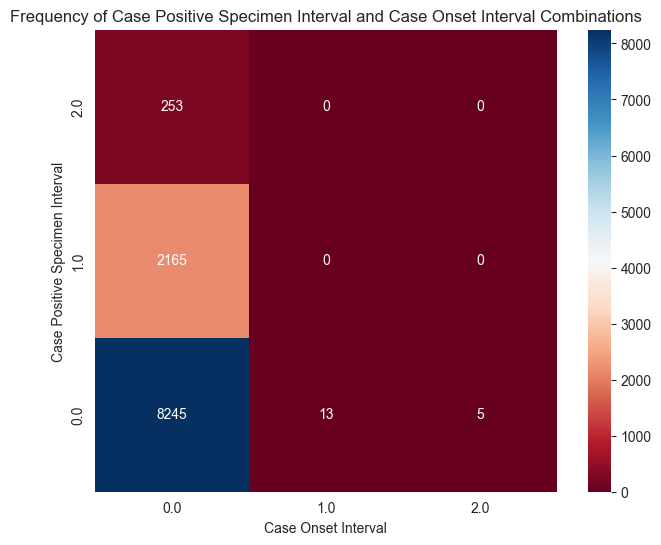

In [166]:
import seaborn as sns
data_filtered = df.dropna(subset=['case_positive_specimen_interval', 'case_onset_interval'])

# Calculate the frequency of each combination, ignoring null values
freq_table = data_filtered.groupby(['case_positive_specimen_interval', 'case_onset_interval'], observed=False).size().unstack(fill_value=0)

# Plotting the heatmap with the requested adjustments
plt.figure(figsize=(8, 6))
sns.heatmap(freq_table, annot=True, cmap="RdBu", fmt="d", square=True)
plt.title('Frequency of Case Positive Specimen Interval and Case Onset Interval Combinations')
plt.xlabel('Case Onset Interval')
plt.ylabel('Case Positive Specimen Interval')
plt.gca().invert_yaxis() # This inverts the y-axis
plt.show()


The heatmap displays the frequency of case positive specimen interval and case onset interval combinations. It's evident that the majority of cases have a 0-week interval for both, which might indicate that symptoms were present which would cause the person to take a test. There's a smaller number of cases with a 1-week interval between positive specimen and onset, and very few cases with a 2-week interval. The reason for these intervals is likely due to the fact a patient would report symptoms and then take a test within 1 or 2 weeks or perhalps a person may experience symptoms but it may take a number of days before a a postive specimen shows in a test.

### Case Positive Specimen Interval vs. Symptom Status

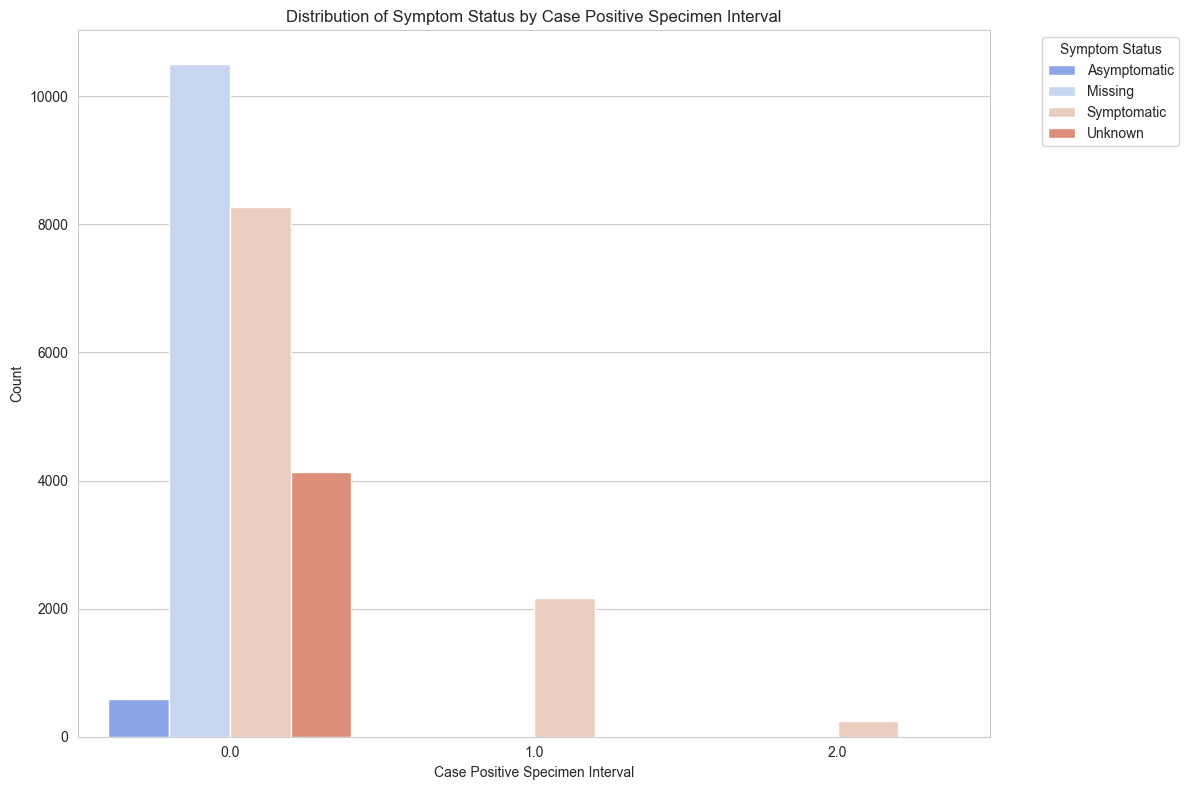

In [167]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='case_positive_specimen_interval', hue='symptom_status', palette="coolwarm")
plt.title('Distribution of Symptom Status by Case Positive Specimen Interval')
plt.xlabel('Case Positive Specimen Interval')
plt.ylabel('Count')
plt.legend(title='Symptom Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This bar chart shows the distribution of symptom statuses across different case positive specimen intervals. We can see that majority of cases with a 1 or 2 week interval have a symptom status of Symptomatic. This is logical as the person would have experienced symptoms and then taken a test within 1 or 2 weeks.

### Age Group vs. Death YN

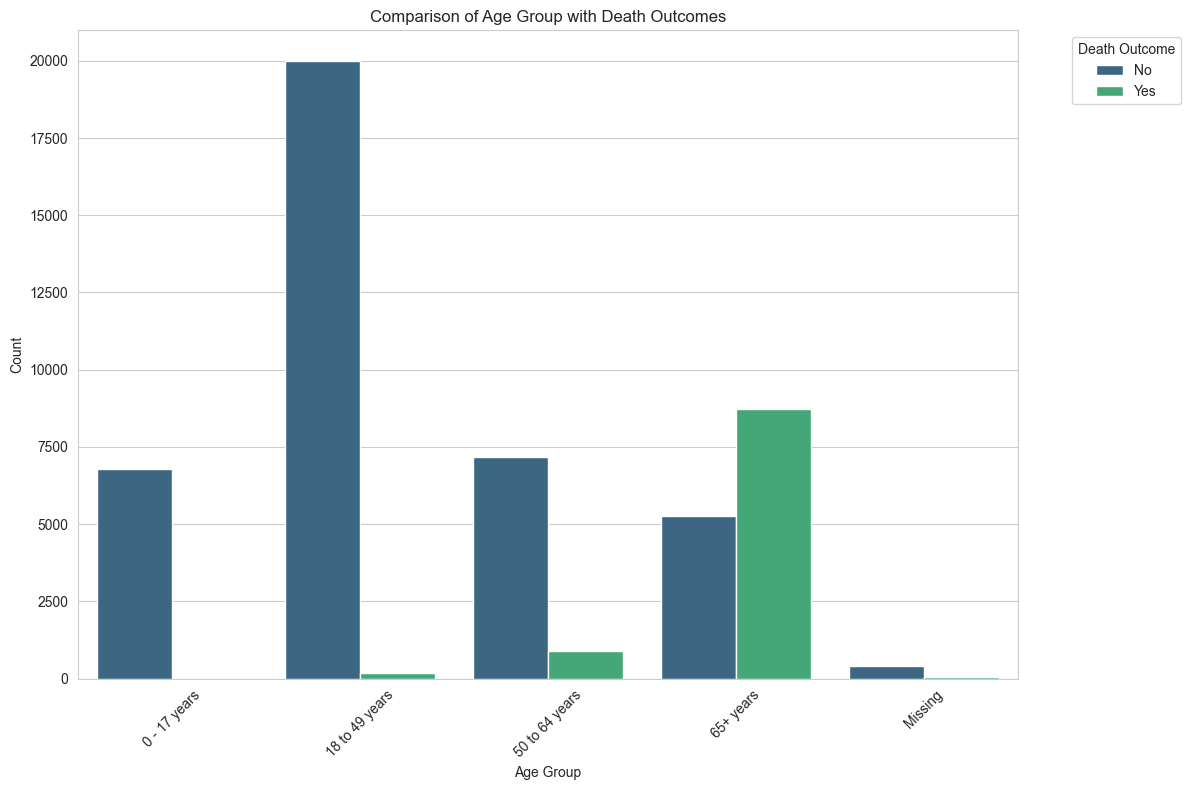

In [168]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='death_yn', palette="viridis")
plt.title('Comparison of Age Group with Death Outcomes')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates X-Axis Ticks by 45-degrees for better readability
plt.legend(title='Death Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

We're looking at the number of COVID-related deaths by age group. It's clear that the older age groups, particularly 65+ years, have a higher death count compared to younger individuals. The 'Missing' category suggests some data isn't fully accounted for.

### Age Group vs. Hosp YN

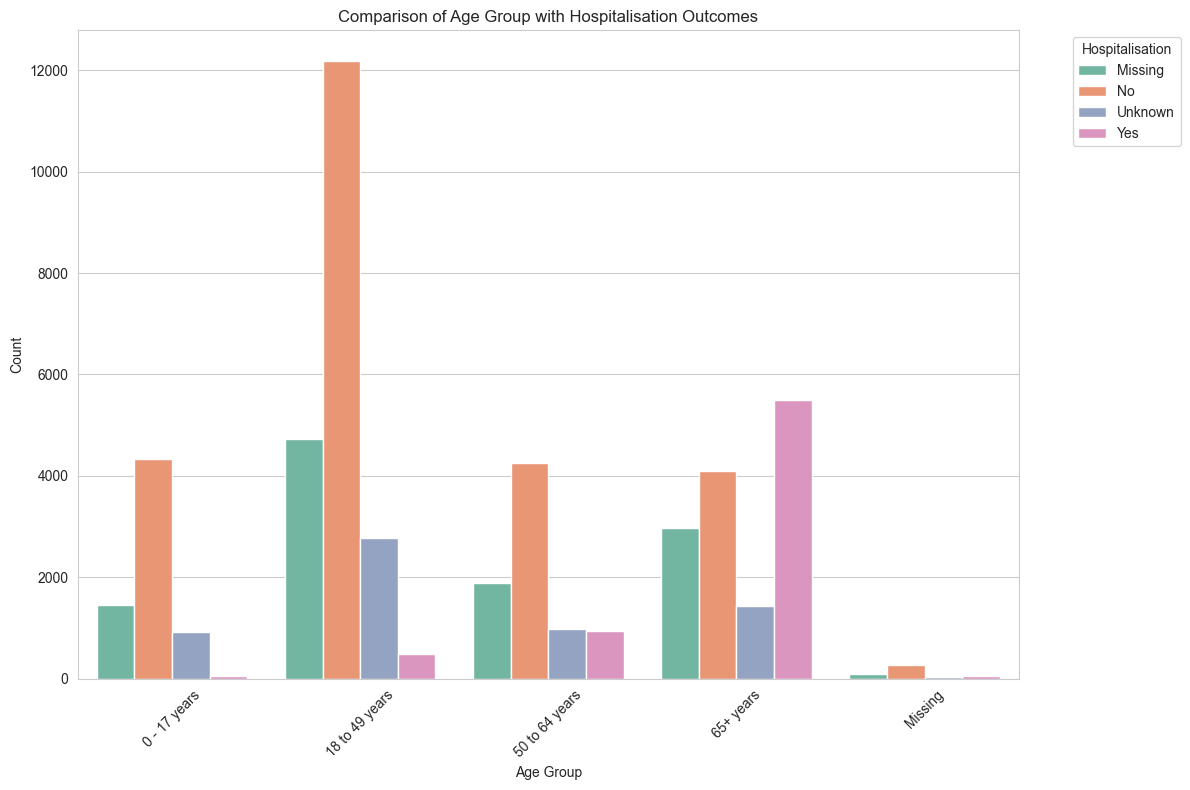

In [169]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='hosp_yn', palette="Set2")
plt.title('Comparison of Age Group with Hospitalisation Outcomes')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates X-Axis Ticks by 45-degrees for better readability
plt.legend(title='Hospitalisation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This chart compares hospitialisation rates across different age groups. It's evident that the older age groups, particularly 65+ years, have a higher hospitalisation rate compared to younger individuals. 

### Proportion of Deaths by Underlying Conditions

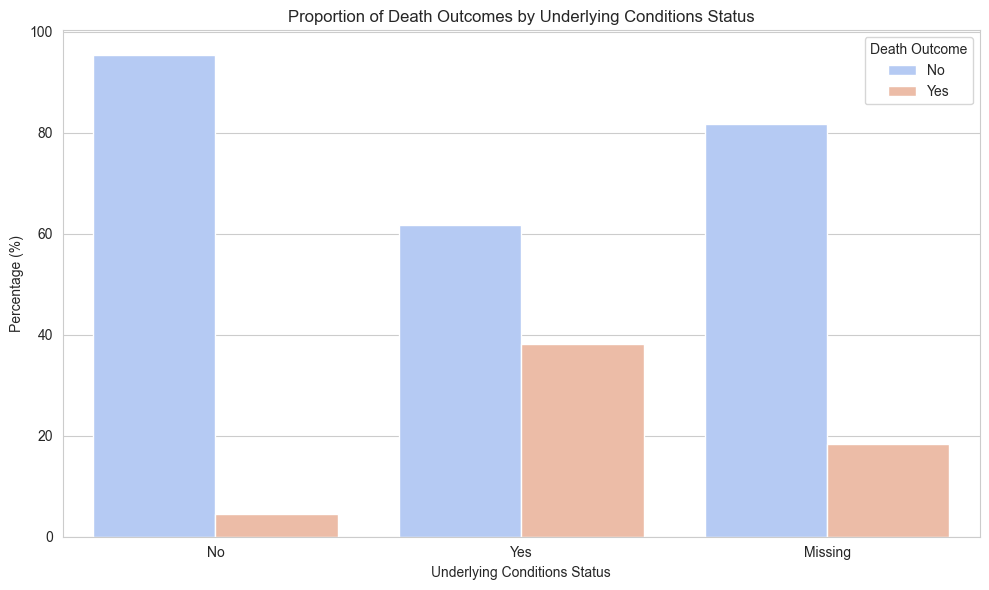

In [170]:
counts = df.groupby(['underlying_conditions_yn', 'death_yn'] ,observed=False,).size().reset_index(name='count')

# Calculate the total number of cases for each 'underlying_conditions_yn' to find the proportion
total_counts = counts.groupby('underlying_conditions_yn', observed=False)['count'].transform('sum')

# Calculate the percentage
counts['percentage'] = (counts['count'] / total_counts) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='underlying_conditions_yn', y='percentage', hue='death_yn', data=counts, palette='coolwarm')
plt.title('Proportion of Death Outcomes by Underlying Conditions Status')
plt.xlabel('Underlying Conditions Status')
plt.ylabel('Percentage (%)')
plt.legend(title='Death Outcome', loc='upper right')

plt.tight_layout()
plt.show()

This bar chart shows the proportion of deaths by underlying conditions. It's evident that deaths are more likely in individuals with underlying conditions. This is logical as individuals with underlying conditions are more likely to have a severe outcome if they contract COVID-19.

### Case Onset Interval vs. Age Groups

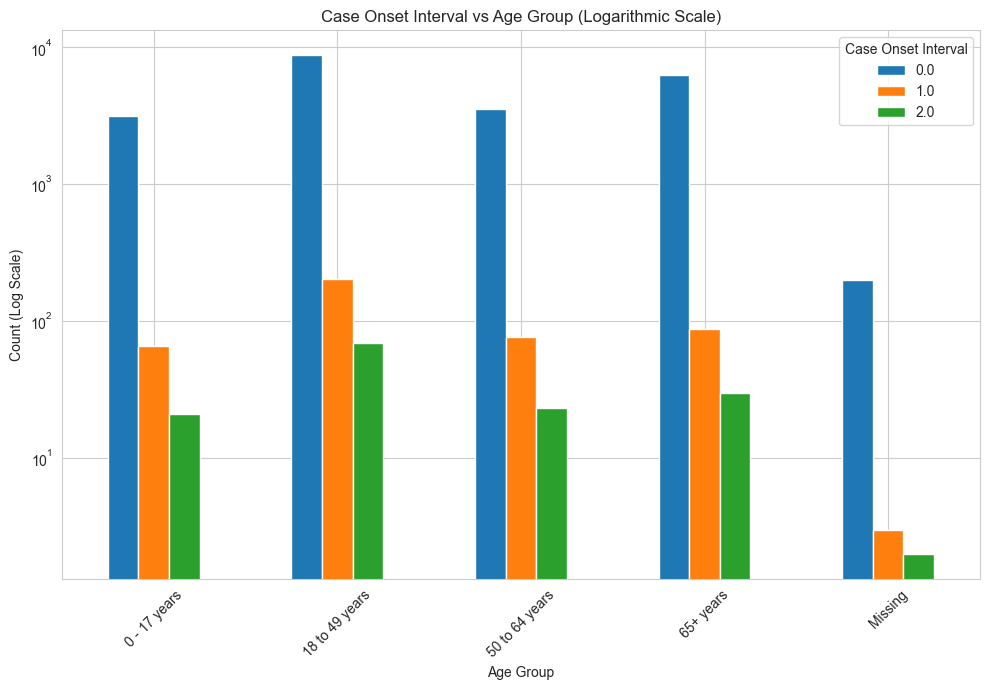

In [171]:
grouped_data = df.groupby(['age_group', 'case_onset_interval'], observed=False).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='age_group', columns='case_onset_interval', values='count').fillna(0)

# Plot
ax = pivot_data.plot(kind='bar', stacked=False, figsize=(10, 7))
ax.set_yscale('log')
plt.title('Case Onset Interval vs Age Group (Logarithmic Scale)')
plt.xlabel('Age Group')
plt.ylabel('Count (Log Scale)')
plt.xticks(rotation=45)
plt.legend(title='Case Onset Interval')

plt.tight_layout()
plt.show()

This bar chart shows the symptom onset interval for different age groups. It's evident that the majority of cases have a 0-week interval for all age groups, which might indicate that symptoms were present which would cause the person to take a test. There's a smaller number of cases with a 1-week interval between positive specimen and onset, and very few cases with a 2-week interval. The reason for this graph was to see if there was a pattern in the onset interval for different age groups.

### Cases and Deaths by State

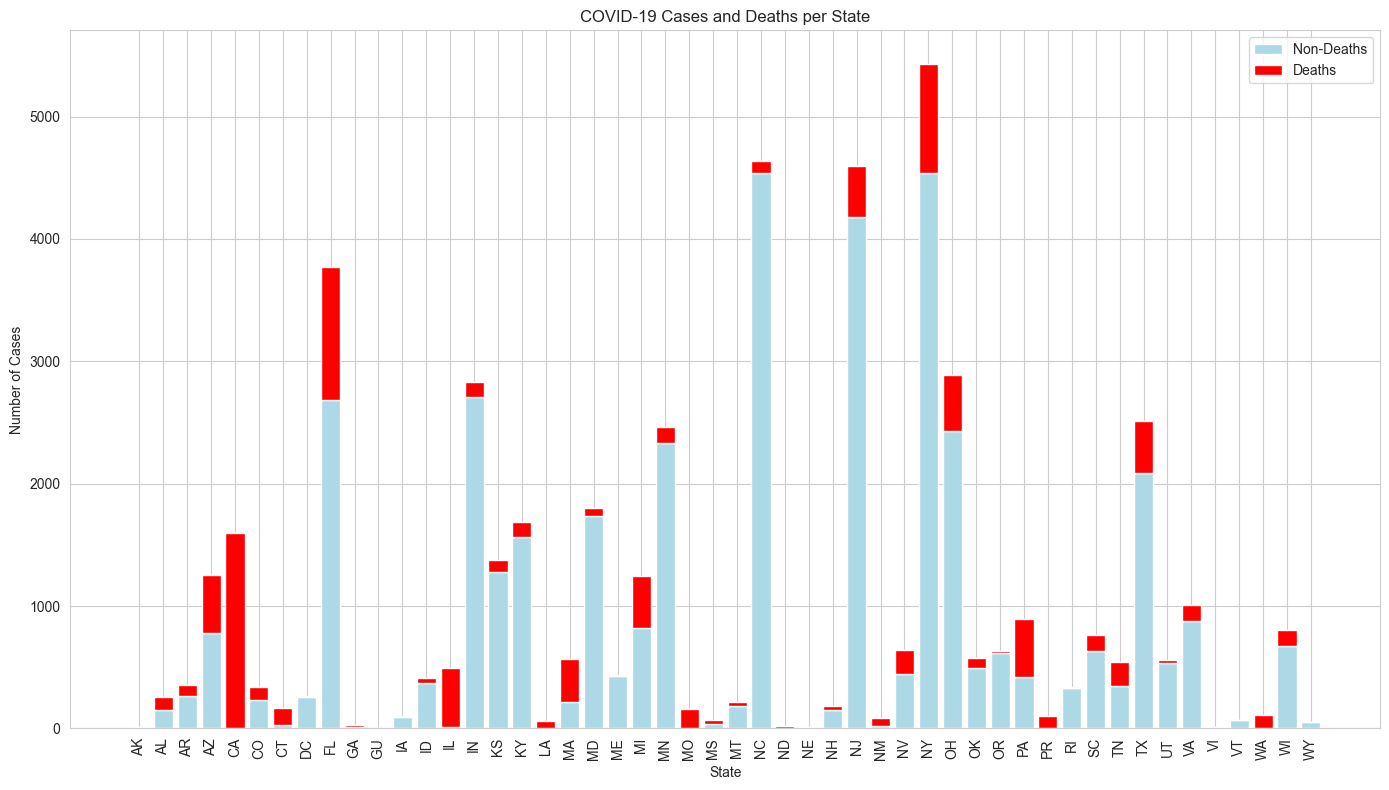

In [172]:
deaths_per_state = df.groupby('res_state', observed=False)['death_yn'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='deaths')

# Calculate the total number of cases (both deaths and non-deaths) per state
total_cases_per_state = df['res_state'].value_counts().reset_index()
total_cases_per_state.columns = ['res_state', 'total_cases']

# Merge the dataframes on 'res_state'
merged_data = pd.merge(total_cases_per_state, deaths_per_state, on='res_state')

# Calculate the number of non-deaths for the stacking in the bar chart
merged_data['non_deaths'] = merged_data['total_cases'] - merged_data['deaths']

# Ensure data is sorted by state for better visualization
merged_data.sort_values('res_state', inplace=True)

# Create stacked bar chart
plt.figure(figsize=(14, 8))
# Plot non-deaths
plt.bar(merged_data['res_state'], merged_data['non_deaths'], color='lightblue', label='Non-Deaths')
# Plot deaths on top of non-deaths
plt.bar(merged_data['res_state'], merged_data['deaths'], bottom=merged_data['non_deaths'], color='red', label='Deaths')

plt.title('COVID-19 Cases and Deaths per State')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

This bar chart shows the cases and deaths by state. It's evident that the number of cases and deaths varies across different states. This is logical as the population size and density varies across different states. However the proportion of cases to deaths changes on a state by state basis. This may be down to a number of reasons such as the population size, the age of the population, the number of people with underlying conditions, the heathcare infrastructure or the reporting of cases and deaths.

### Death vs. Sex

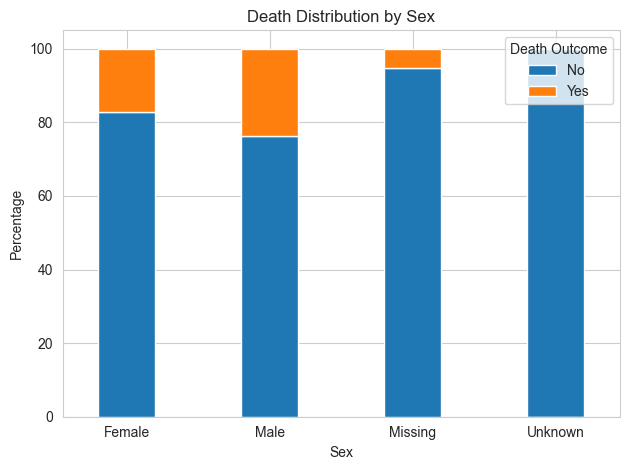

In [173]:
deaths_sex_distribution = df.groupby('sex', observed=False)['death_yn'].value_counts().unstack().fillna(0)

# Convert counts to percentages
deaths_sex_percentage = deaths_sex_distribution.div(deaths_sex_distribution.sum(axis=1), axis=0) * 100


deaths_sex_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.4)
plt.title('Death Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Death Outcome', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

This stacked bar chart breaks down mortality by sex, with the color difference between orange and blue showing the proportion of deaths versus survival. It is a useful visual to see if there are any significant differences in death rates between genders.

### Deaths vs. Hospitilisation

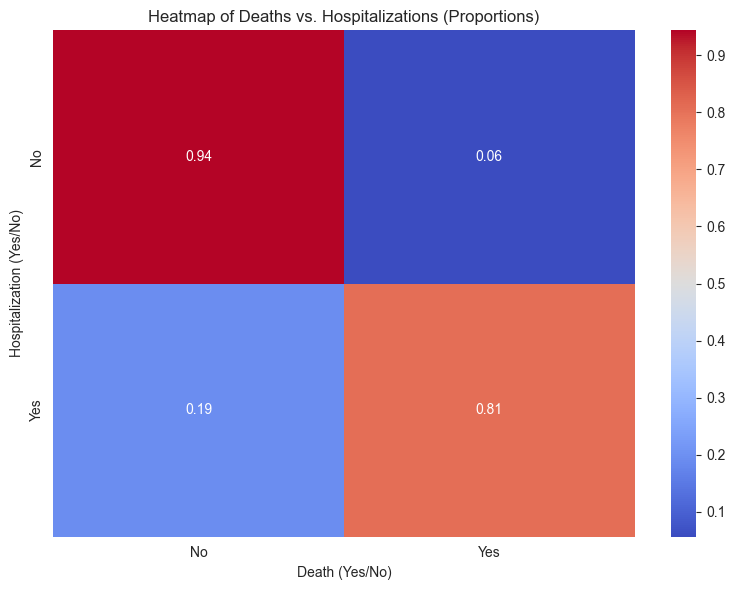

In [186]:
filtered_data = df[df['hosp_yn'].isin(['Yes', 'No'])]

# Creating a cross-tabulation of deaths and hospitalizations
death_hosp_crosstab = pd.crosstab(index=filtered_data['hosp_yn'], columns=filtered_data['death_yn'])

# Normalize the crosstab to show proportions
death_hosp_crosstab_normalized = death_hosp_crosstab.div(death_hosp_crosstab.sum(axis=1), axis=0)

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(death_hosp_crosstab_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Deaths vs. Hospitalizations (Proportions)')
plt.xlabel('Death (Yes/No)')
plt.ylabel('Hospitalization (Yes/No)')

plt.tight_layout()
plt.show()

This heatmap shows the proportion of cases resulting in death against those requiring hospitalization. It’s a simple, color-coded way to quickly grasp the relationship between hospitalization and death rates. It looks like being hospitalized with COVID-19 significantly increases the chances of a fatal outcome.

### ICU vs. Death

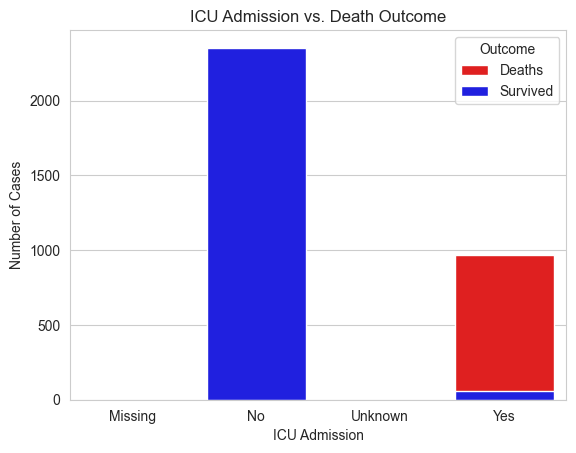

In [175]:
filtered_data = df[df['icu_yn'].isin(['Yes', 'No'])]

# Count the number of deaths for each ICU status
icu_death_counts = filtered_data.groupby('icu_yn', observed=False)['death_yn'].value_counts().unstack()

# Plot the counts as a bar chart.
sns.barplot(data=icu_death_counts, x=icu_death_counts.index, y='Yes', color='red', label='Deaths')
sns.barplot(data=icu_death_counts, x=icu_death_counts.index, y='No', color='blue', label='Survived')

plt.title('ICU Admission vs. Death Outcome')
plt.xlabel('ICU Admission')
plt.ylabel('Number of Cases')
plt.legend(title='Outcome')
plt.show()

Looking at the relationship between ICU admission and death. It's evident that the majority of cases that were admitted to the ICU resulted in death.

### - Discuss your findings from the plots above.

- The heatmap with case positive specimen interval and case onset interval combinations highlights a clear concentration of cases diagnosed and symptoms onset happening simultaneously (0-week interval). This suggests prompt testing upon symptom development, which is crucial for quick isolation and treatment.
- The bar chart of symptom status by case positive specimen interval indicates that as the interval increases, the proportion of symptomatic cases also increases. This implies that people with symptoms are getting tested shortly after symptom onset, which may be driven by the desire to confirm a COVID-19 diagnosis when symptomatic
- The comparison of age group with death outcomes shows an expected trend where older age groups have a higher count of deaths, indicating the increased vulnerability of the elderly to severe outcomes from COVID-19.
- This is further supported by the hospitalization rates across different age groups, which also show a higher rate of hospitalization for older age groups.
- Also we can see from the deaths vs. hospitilisation heatmap makes it quite evident that hospitalisations are strongly associated with deaths. A large majority of those who didn't require hospitalisation survived, while the death rate for hospitalized individuals is significant. This suggests that the severity of the disease, leading to hospitalization, might be a strong indicator of the risk of death.
- The cases and deaths by state bar chart indicates that the distribution of COVID-19 cases and deaths varies significantly across states. Some states have high numbers of cases but relatively lower deaths, suggesting better healthcare or less fatal strains. In contrast, states with a higher proportion of red bars suggest a higher mortality rate, possibly due to overwhelmed healthcare systems or demographics with more at-risk populations. However we must also take into account that each state had different policies and procedures in place to deal with the pandemic, they also would have had different policies to reporting and testing for example in California all cases resulted in deaths, a likely reson for this is that California was only reporting deaths to the CDC and not cases.
- There is also a clear relationship between ICU admission and death, with the majority of cases that were admitted to the ICU resulting in death. This suggests that ICU admission is a strong indicator of the risk of death.

# 4. Transform, extend or combine the existing features to create a few new features (at least 3)

### Feature 1: Age-Hospitalization Severity Score (AHSS)
The Age-Hospitalization Severity Score (AHSS) is designed to account for the combined impact of age and hospitalization status on the severity of COVID-19 outcomes. The feature will be numeric, combining the age group's risk factor with a multiplier based on hospitalization status.
Steps and Justification:
- Age Group Risk Factor: Assign a base score to each age group reflecting the increasing risk of severe COVID-19 outcomes with age. Older age groups have been consistently shown to be at higher risk for severe outcomes, including hospitalization and death. Age groups will be assigned risk scores from 1 (youngest) to 4 (oldest).

- Hospitalization Multiplier: Apply a multiplier based on hospitalization status, with a higher value for patients who were hospitalized. This reflects the increased severity and potential for poor outcomes in hospitalized cases. Hospitalization status will have a multiplier of 1 for non-hospitalized and 2 for hospitalized cases.

- Combining Factors: Multiply the age group risk factor by the hospitalization multiplier to get the AHSS. This method captures the interaction between age and disease severity, acknowledging that older hospitalized patients are at particularly high risk.


In [176]:
# Define the age group risk scores
age_group_risk_scores = {
    '0 - 17 years': 1,
    '18 to 49 years': 2,
    '50 to 64 years': 3,
    '65+ years': 4
}

# Define the hospitalization multiplier
hospitalization_multiplier = {
    'No': 1,
    'Yes': 2
}

# Calculate the AHSS for each row in the dataframe
df['AHSS'] = df['age_group'].map(age_group_risk_scores) * df['hosp_yn'].map(hospitalization_multiplier)

df['AHSS'] = df['AHSS'].astype('category')



### Graph of Deaths vs. AHSS

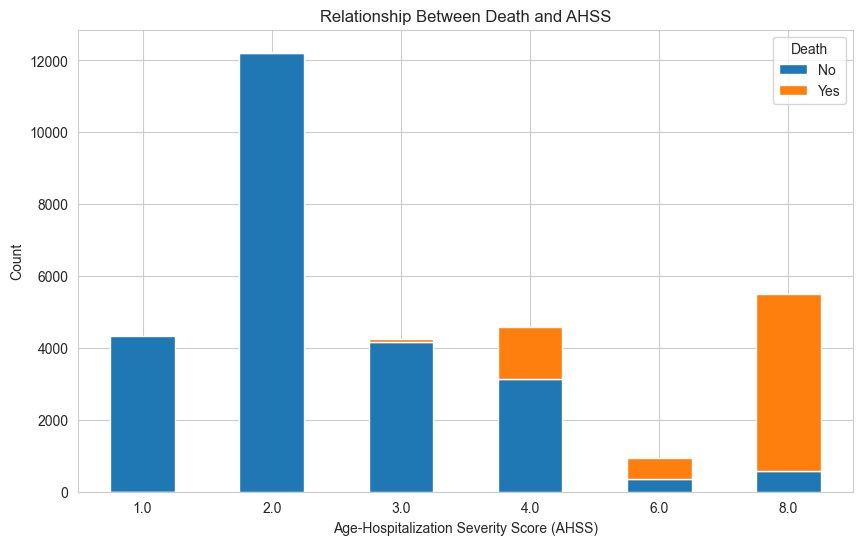

In [177]:
death_yn_summary = df.groupby(['AHSS', 'death_yn'], observed=False).size().unstack(fill_value=0)

# Plotting the bar chart
death_yn_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Relationship Between Death and AHSS')
plt.xlabel('Age-Hospitalization Severity Score (AHSS)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Death', labels=['No', 'Yes'])

plt.show()

Looking at this graph it is clear that the AHSS is a good indicator of the risk of death. The higher the AHSS the higher the risk of death. This is logical as the AHSS is a combination of age and hospitalisation status, both of which are strong indicators of the risk of death.

### Feature 2: Comprehensive Severity Score (CSS)
The CSS is designed to integrate various aspects of a patient's COVID-19 case, including symptom presentation, hospitalization status, intensive care unit (ICU) admission, and the presence of underlying conditions. By combining these indicators into a single metric, we aim to capture the overall severity of the case more effectively than any single factor could alone.

Steps and Justification:
- Symptom Status: Incorporate symptom status as an indicator of initial illness severity. We can assign numeric values, with higher values for symptomatic cases and lower for asymptomatic or unknown statuses.

- Hospitalization: Hospitalization status is a strong indicator of severity. Assign a higher weight to cases requiring hospitalization.

- ICU Admission: ICU admissions denote critical cases. This factor should have a significant impact on the score.

- Underlying Conditions: The presence of underlying conditions can exacerbate COVID-19 outcomes. Including this factor acknowledges the increased risk for these patients.

In [178]:
# Assign scores to each category within the components
symptom_status_scores = {'Asymptomatic': 1, 'Symptomatic': 2, 'Missing': 0, 'Unknown': 0}
hosp_yn_scores = {'Yes': 3, 'No': 1, 'Missing': 0, 'Unknown': 0}
icu_yn_scores = {'Yes': 4, 'No': 1, 'Missing': 0, 'Unknown': 0}
underlying_conditions_yn_scores = {'Yes': 2, 'No': 1, 'Missing': 0, 'Unknown': 0}

# Apply scores
df['symptom_status_score'] = df['symptom_status'].map(symptom_status_scores)
df['hosp_yn_score'] = df['hosp_yn'].map(hosp_yn_scores)
df['icu_yn_score'] = df['icu_yn'].map(icu_yn_scores)
df['underlying_conditions_yn_score'] = df['underlying_conditions_yn'].map(underlying_conditions_yn_scores)

# Calculate the Comprehensive Severity Score (CSS)
df['CSS'] = df[['symptom_status_score', 'hosp_yn_score', 'icu_yn_score', 'underlying_conditions_yn_score']].sum(axis=1)
df['CSS'] = df['CSS'].astype('category')

df.drop(['symptom_status_score', 'hosp_yn_score', 'icu_yn_score', 'underlying_conditions_yn_score'], axis=1, inplace=True)
# Display the dataset to verify the new feature
df[['symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn', 'CSS']].head()


,symptom_status,hosp_yn,icu_yn,underlying_conditions_yn,CSS
0,Unknown,Yes,Unknown,Missing,3
1,Missing,No,Missing,Missing,1
2,Symptomatic,No,Missing,Missing,3
3,Symptomatic,No,Missing,Yes,5
4,Missing,Missing,Missing,Missing,0


### Deaths per CSS

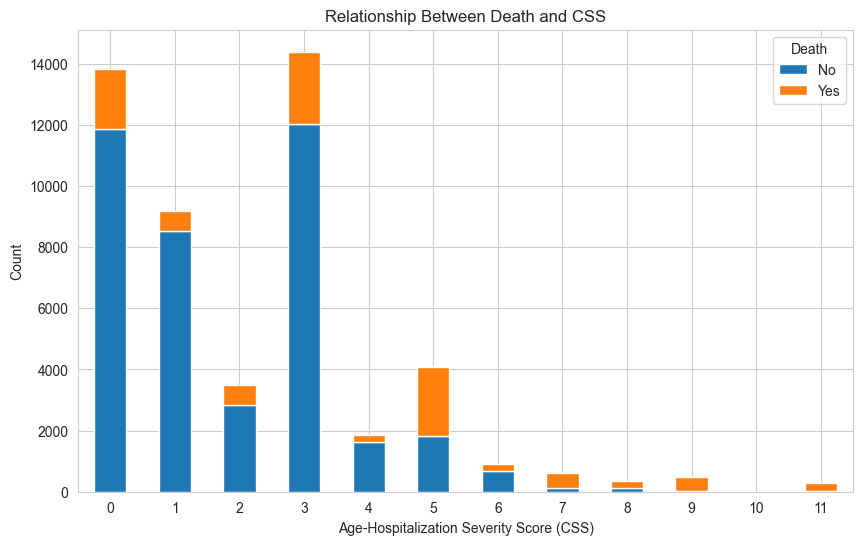

In [179]:
death_yn_summary = df.groupby(['CSS', 'death_yn'], observed=False).size().unstack(fill_value=0)

# Plotting the bar chart
death_yn_summary.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Relationship Between Death and CSS')
plt.xlabel('Age-Hospitalization Severity Score (CSS)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Death', labels=['No', 'Yes'])

Looking at the graph we can see that the higher the CSS the higher the risk of death. When looking at the data we can now look at the CSS to easily see the severity of the case rather than loking across a number of different features.

### Feature 3: Month and Year

Convert case_month into more granular time-based features: 
- Year: The year in which the case was reported.
- Month: The month of the year, capturing seasonal effects.

Such features can include the progression of the pandemic over time, seasonal effects, and the impact of public health interventions (e.g., lockdowns, vaccination campaigns).

In [180]:
df['year'] = df['case_month'].dt.year
df['month'] = df['case_month'].dt.month
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')


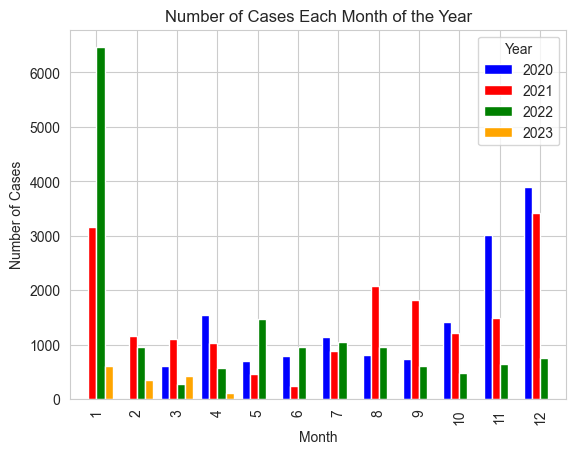

In [181]:
df.groupby([df['month'], 'year'], observed=False).size().unstack().plot(kind='bar', color=['blue', 'red', 'green', 'orange'], width=0.8)

plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Number of Cases Each Month of the Year')
plt.legend(title='Year')

plt.show()


By adding this feature it makes it easier to see seasonal effects and the progression of the pandemic over time. It also makes it easier to see the impact of public health interventions as the lockdowns and vaccination campaigns progressed. We can also see if there are any seasonal effects on the data and it makes it easier for a model to pick up on these patterns.

### To finish - Print data types, descriptive tables, save to csv

In [182]:
df.dtypes

case_month                         datetime64[ns]
res_state                                category
res_county                               category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval          category
case_onset_interval                      category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
AHSS                                     category
CSS                                      category
year                                     category
month                                    category
dtype: object

In [183]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
res_state,49445,50,NY,5433
res_county,49445,952,Missing,2766
age_group,49445,5,18 to 49 years,20159
sex,49445,4,Female,25244
race,49445,8,White,29929
ethnicity,49445,4,Non-Hispanic/Latino,29303
case_positive_specimen_interval,25955.0,3.0,0.0,23488.0
case_onset_interval,22527.0,3.0,0.0,21947.0
current_status,49445,2,Laboratory-confirmed case,46233
symptom_status,49445,4,Symptomatic,22527


In [184]:
df.to_csv('covid19-cdc-20478622-1-3-cleaned.csv', index=False)